1.The Problem Definition  
2.DATA EXTRACTION  
2.1.UPLOADING AND EXPLORING THE DATA  
2.1.2.FINDING OUT THE ENCODING TYPE  
2.1.3.CLEANING THE COLUMNS' NAME  
2.1.4.CHECKING THE DATA'S SHAPE AND NAN VALUES  
2.1.5.CHECKING THE DATA'S TYPES  
3.DATA PREPROCESSING  
3.1.Feature Engineering:  
3.1.1- Variable Transformation  
3.1.1.1 - A class to treat the data  
3.1.1.1.2 - Checking the memory usage after casted the data  
3.1.1.1.3 - Checking the categorical columns  
4. Analysis  
4.1 A Bar Plot to analyze the rented month and year  
4.1.1 Creating a dataframe groupying values by month and year  
4.1.1.1 Selecting the values  
4.1.1.2 Groupyng values by year and month  
4.1.1.3 Setting the index by year and month in order of month of the year  
4.1.1.4 Dividing the 'rented_bikes_count' columns per 1000 to display the number as Hundreds of thousands  
4.1.1.5 Transforming the column 'rented_bikes_count' dividing it per 1000 to display the number as Hundreds of thousands  
4.1.1.6 Developing the Bar Chart of Rented bikes by year and month  
4.2 A Bar Plot to analyze the total bikes rented by season  
4.2.1 Creating a dataframe groupying values by season and month  
4.2.2.1 Grouping by Season  
4.2.2.2 Dividing the 'rented_bikes_count' columns per 1000 to display the number as thousands  
4.2.2.3 Developing the Bar Chart of Rented bikes by season of the year  
5 Detecting Outliers  
5.1 Creating the charts  
5.2 Checking the Outliers  
5.2.1 Tukey's Method  
5.2.1.2 Calculating the Mild Outliers  
5.2.1.2.1 Mild Outliers - temperature °c  
5.2.1.2.1 A Box plot for temperature outliers  
5.2.1.2.2 A Box plot for Humidity outliers  
5.2.1.2.3 A Box plot for Wind Speed outliers  
5.2.1.2.3.1  Identifying Wind Speed outliers  
5.2.1.2.3.1.2  Calculating the Wind speed Mild Outliers  
5.2.1.2.3.1.3  Calculating the Wind speed Extreme Outliers  
5.2.1.2.3.1.4 Getting the total number of Outliers  
5.2.1.2.3.1.5 Getting the percentage of Outliers  
5.2.1.2.3.1.6 Pointing out the Wind Speed Outliers  
5.2.1.2.3.1.7 A chart to identify wind Speed Outliers by season and month  
5.2.1.3 A Box plot for Solar Radiation outliers  
5.2.1.4 A Box plot for Visibility outliers  
5.2.1.5 A Box plot for Rainfall outliers  
6 Applying the Binning Technique  
6.1 Binning the Wind Category  
6.1.1 Creating a new Dataframe with the Wind Category feature  
6.1.1.1 Checking the unique values of the Wind Category feature 
6.1.1.1.1 Analysing the binning's impact  
6.2. Binning the Solar Radiation Category  
6.2.1 Creating a new Dataframe with the Solar Radiaton Category feature  
6.2.1.1 Checking the unique values of the Solar Radiaton Category feature  
6.3 Binning the Visibility Category  
6.3.1 Creating a new Dataframe with the Visibility Category feature  
6.3.1.1 Checking the unique values of the Visibility Category feature  
6.4 Binning the Snow Category  
6.4.1 Creating a new Dataframe with the Snow Category feature  
6.4.1.1 Checking the unique values of the Snow Category   
6.5 Checking all columns and dropping the ones that we had binned  
6.6 Looking for NAN values  
6.7 Redefining the columns order  
6.7.1 Checking the columns' categories  
7 Separating the dataframe into trainint and test  
8 Applying the Machile Learning Models  
8.1 Foward Selection Linear Regression  
8.1.1 Creating Functions  
8.1.2 CategorialVaribleEncoder Function and FowardSelectionLinearRegression Function  
8.1.3 Applying the Forward Selection Leinear Regression Model  
8.1.3.1 Seeing the Best Predictors  
8.1.3.1.1 Get the total number of best predictors  
8.1.3.1.2 Checking the shape  
8.1.4 Getting the R2 Score  
8.1.4.1 Getting the maximum value predicted  
8.2 Plotting the values  
8.2.1 A draft chart without mean  
8.2.2 Grouping values to create a chart  
8.2.3 Plotting the Foward Selection Linear Regression charts  
8.2.3.1 Plotting the Foward Selection Linear Regression charts by month  
8.2.3.1.1 A function to plot by month  
8.2.3.1.1.1 Creating a DataFrame with prediction and real values  
8.2.3.1.1.2 Plotting by month  



# 1.The Problem Definition

The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information

Additional Information
Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [1]:
# importing
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import chardet
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
!pip install -q -U watermark



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import sklearn

In [4]:
%reload_ext watermark
%watermark -a "Bikes Seoul Versions" --iversions

Author: Bikes Seoul Versions

chardet   : 4.0.0
numpy     : 1.21.5
joblib    : 1.0.1
matplotlib: 3.3.4
missingno : 0.5.0
seaborn   : 0.11.1
sklearn   : 0.24.1
pandas    : 1.2.4



# 2.DATA EXTRACTION

## 2.1.UPLOADING AND EXPLORING THE DATA

In [5]:
# uploading data
path = "../seoul_bike_sharing_demand\SeoulBikeData.csv"

In [6]:
df_seoulbike = pd.read_csv(path)

In [7]:
df_seoulbike.head(7)

,Date,Rented Bike Count,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.0,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.0,0.0,0.0,Winter,No Holiday,Yes


## 2.1.2.FINDING OUT THE ENCODING TYPE


In [8]:
#Let's clean the varible's names to work with it.
df_seoulbike.columns.to_list()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(�C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(�C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [9]:
#Ok we have a little suprise here. The symbol �, I don't know o que that means. 
#So I had to findout what is this to work with pandas.
#So I will use the chardet library to help me with this.
with open(path, 'rb') as encoding:
    r_encoding = chardet.detect(encoding.read(100000))
r_encoding


{'encoding': 'ISO-8859-9',
 'confidence': 0.7396635956274547,
 'language': 'Turkish'}

In [10]:
# Good, now I will open the as a dataframe with the right encoding.
with open (path,'r',encoding=r_encoding['encoding']) as df_seoulbike:
    df_seoulbike= pd.read_csv(df_seoulbike)

In [11]:
df_seoulbike.columns.to_list()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

## 2.1.3.CLEANING THE COLUMNS' NAME

In [12]:
#Building a function to clean the columns name. Taking out the space and putting all in lower case:
replacing1= {" ":"_"}


cols = [col.strip().lower().replace(" ","_")
       for col in df_seoulbike.columns]

df_seoulbike.columns = cols
df_seoulbike.columns.to_list()

['date',
 'rented_bike_count',
 'hour',
 'temperature(°c)',
 'humidity(%)',
 'wind_speed_(m/s)',
 'visibility_(10m)',
 'dew_point_temperature(°c)',
 'solar_radiation_(mj/m2)',
 'rainfall(mm)',
 'snowfall_(cm)',
 'seasons',
 'holiday',
 'functioning_day']

###  2.1.4.CHECKING THE DATA'S SHAPE AND NAN VALUES 

In [13]:
#Let's check the shape of the dataset
initial_shape = df_seoulbike.shape
initial_shape

(8760, 14)

In [14]:
#Good, Now let's see if we have some missing values.
# So I can do it with a isnan function
df_seoulbike.isna().sum()

date                         0
rented_bike_count            0
hour                         0
temperature(°c)              0
humidity(%)                  0
wind_speed_(m/s)             0
visibility_(10m)             0
dew_point_temperature(°c)    0
solar_radiation_(mj/m2)      0
rainfall(mm)                 0
snowfall_(cm)                0
seasons                      0
holiday                      0
functioning_day              0
dtype: int64

<AxesSubplot:>

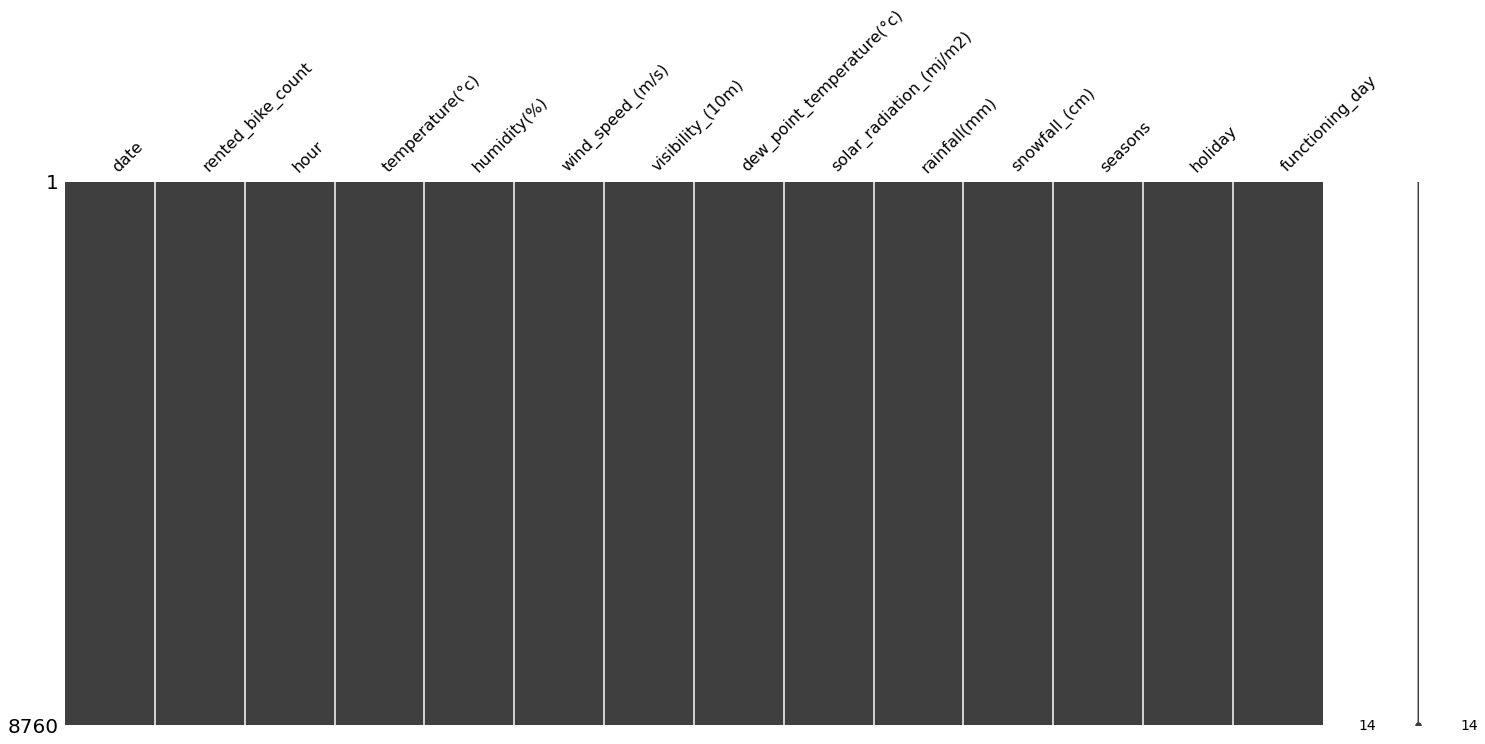

In [15]:
#I could also check it with a missingno library
msno.matrix(df_seoulbike)

### 2.1.5.CHECKING THE DATA'S TYPES 

In [16]:
#Ok really no missing values
#Let's ckeck the type of columns do we have
df_seoulbike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       8760 non-null   object 
 1   rented_bike_count          8760 non-null   int64  
 2   hour                       8760 non-null   int64  
 3   temperature(°c)            8760 non-null   float64
 4   humidity(%)                8760 non-null   int64  
 5   wind_speed_(m/s)           8760 non-null   float64
 6   visibility_(10m)           8760 non-null   int64  
 7   dew_point_temperature(°c)  8760 non-null   float64
 8   solar_radiation_(mj/m2)    8760 non-null   float64
 9   rainfall(mm)               8760 non-null   float64
 10  snowfall_(cm)              8760 non-null   float64
 11  seasons                    8760 non-null   object 
 12  holiday                    8760 non-null   object 
 13  functioning_day            8760 non-null   objec

In [17]:
memory_usage1 = df_seoulbike.memory_usage().sum()

In [18]:
df_seoulbike.dtypes

date                          object
rented_bike_count              int64
hour                           int64
temperature(°c)              float64
humidity(%)                    int64
wind_speed_(m/s)             float64
visibility_(10m)               int64
dew_point_temperature(°c)    float64
solar_radiation_(mj/m2)      float64
rainfall(mm)                 float64
snowfall_(cm)                float64
seasons                       object
holiday                       object
functioning_day               object
dtype: object

In [19]:
int_type = df_seoulbike.select_dtypes(include = "integer").columns.to_list()
float_type = df_seoulbike.select_dtypes(include = "float").columns.to_list()
object_type = df_seoulbike.select_dtypes(include = "object").columns.to_list()

print("The int columns type are: ")
print(int_type)
print()

print("The float columns type are: ")
print(float_type)

print("The object columns type are: ")
print(object_type)



The int columns type are: 
['rented_bike_count', 'hour', 'humidity(%)', 'visibility_(10m)']

The float columns type are: 
['temperature(°c)', 'wind_speed_(m/s)', 'dew_point_temperature(°c)', 'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)']
The object columns type are: 
['date', 'seasons', 'holiday', 'functioning_day']


In [20]:
df_seoulbike.select_dtypes(include = "integer").head(3)

,rented_bike_count,hour,humidity(%),visibility_(10m)
0,254,0,37,2000
1,204,1,38,2000
2,173,2,39,2000


In [21]:
df_seoulbike.select_dtypes(include = "float").head(3)

,temperature(°c),wind_speed_(m/s),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
0,-5.2,2.2,-17.6,0.0,0.0,0.0
1,-5.5,0.8,-17.6,0.0,0.0,0.0
2,-6.0,1.0,-17.7,0.0,0.0,0.0


In [22]:
df_seoulbike.select_dtypes(include = "object").head(3)

,date,seasons,holiday,functioning_day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes


In [23]:
#Hun I'm not sure we need use float64 in all float types. Maybe we can improve it.
#Let's ckeck the usage of all memory.
first_memory_usage = df_seoulbike.memory_usage(deep=True)
first_memory_usage

Index                           128
date                         586920
rented_bike_count             70080
hour                          70080
temperature(°c)               70080
humidity(%)                   70080
wind_speed_(m/s)              70080
visibility_(10m)              70080
dew_point_temperature(°c)     70080
solar_radiation_(mj/m2)       70080
rainfall(mm)                  70080
snowfall_(cm)                 70080
seasons                      551880
holiday                      585624
functioning_day              525305
dtype: int64

## 3.DATA ANALYSING AND PREPROCESSING

### 3.1.Feature Engineering:

##### Ok now we know the type of columns we are working with. Let's casting some of then and create other ones to build our analisys. For that let's create a class to treat our data.


### 3.1.1- Variable Transformation

#### 3.1.1.1 - A class to treat the data

In [24]:


class Treating_data:
    '''
    A class to cast the datetypes and to create new columns date type.. 
    Changing the data type, creating new date columns information and changing the new columns date type.
    '''
    
    def __init__(self, df_bike):
        '''
        Creating the sequence of treating to data.
        '''
        self.df_bike = df_bike
        self.changing_type(self.df_bike)
        self.creating_date_info(self.df_bike)
        self.changing_type_after_date_info(self.df_bike)
        self.changing_to_binary_column(self.df_bike)


    def changing_type(self,df_seoulbike):
        '''
        A functon to change the size of float type, 
        to create a column to datetime type and change object type to category type.
        '''
        for coluna in df_seoulbike.columns:
            if "temperature" in coluna:
                df_seoulbike[coluna] = df_seoulbike[coluna].astype("float16")
            elif "date" in coluna:
                df_seoulbike[coluna] = pd.to_datetime(arg=df_seoulbike[coluna],format= "%d/%m/%Y")
            elif coluna in ['seasons','holiday','functioning_day']:
                df_seoulbike[coluna] = df_seoulbike[coluna].astype("category")
        return  df_seoulbike


    def creating_date_info(self,df_seoulbike):
        '''
        A function to create date type columns.
        '''
        df_seoulbike['day_of_week'] =df_seoulbike['date'].dt.weekday #The day of the week with Monday=0, Sunday=6.
        #df_seoulbike['day_of_week'] =df_seoulbike['date'].dt.day_name() 
        df_seoulbike['year'] = df_seoulbike['date'].dt.year
        df_seoulbike['month'] = df_seoulbike['date'].dt.month #I need this feature to stratify during the train and test moment
        #df_seoulbike['day_of_year'] = df_seoulbike['date'].dt.dayofyear
        #df_seoulbike['week_of_year'] = df_seoulbike['date'].dt.isocalendar().week
        #df_seoulbike['month_name'] = df_seoulbike['date'].dt.month_name()
        #df_seoulbike['period_day'] = df_seoulbike['date'].dt.strftime('%a')
        df_seoulbike['month_name'] = df_seoulbike['date'].dt.strftime('%b')
        return  df_seoulbike

    def changing_type_after_date_info(self,df_seoulbike):
        '''
        A function to cast columns as category.
        '''
        for coluna in df_seoulbike.columns:
            if coluna in ['day_of_week','year','month','week_of_year', 'month_name','hour']:
                df_seoulbike[coluna] = df_seoulbike[coluna].astype("category")
        return  df_seoulbike
    
    def changing_to_binary_column(self,df_seoulbike):
        '''
         A function to cast columns as binary.
        '''
        df_seoulbike["holiday"] = df_seoulbike["holiday"].map({"No Holiday":0,"Holiday":1})
        df_seoulbike["functioning_day"] = df_seoulbike["functioning_day"].map({"No" : 0, "Yes":1})


In [25]:
#let's instancied our data into the class
df_seoulbike = Treating_data(df_seoulbike)

In [26]:
df_seoulbike.df_bike.head(7)

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,month_name
0,2017-12-01,254,0,-5.199219,37,2.2,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
1,2017-12-01,204,1,-5.500000,38,0.8,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
2,2017-12-01,173,2,-6.000000,39,1.0,2000,-17.703125,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
3,2017-12-01,107,3,-6.199219,40,0.9,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
4,2017-12-01,78,4,-6.000000,36,2.3,2000,-18.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
5,2017-12-01,100,5,-6.398438,37,1.5,2000,-18.703125,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
6,2017-12-01,181,6,-6.601562,35,1.3,2000,-19.500000,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec


In [27]:

df_seoulbike_treated = df_seoulbike.df_bike

In [28]:
#saving the dataframe to use in Power BI Analysis
df_seoulbike_treated.to_csv('../documents/df_seoulbike_treated.csv', index=False) 

In [29]:
#checking the new information of the data types and memory usage.
#As you can see we change the type of the data.
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       8760 non-null   datetime64[ns]
 1   rented_bike_count          8760 non-null   int64         
 2   hour                       8760 non-null   category      
 3   temperature(°c)            8760 non-null   float16       
 4   humidity(%)                8760 non-null   int64         
 5   wind_speed_(m/s)           8760 non-null   float64       
 6   visibility_(10m)           8760 non-null   int64         
 7   dew_point_temperature(°c)  8760 non-null   float16       
 8   solar_radiation_(mj/m2)    8760 non-null   float64       
 9   rainfall(mm)               8760 non-null   float64       
 10  snowfall_(cm)              8760 non-null   float64       
 11  seasons                    8760 non-null   category      
 12  holida

In [30]:
df_seoulbike_treated.select_dtypes(include = "float").columns.to_list()

['wind_speed_(m/s)',
 'solar_radiation_(mj/m2)',
 'rainfall(mm)',
 'snowfall_(cm)']

In [31]:
#We still having something to work here. See, we had cast all the numerical types as 64. But do we really need it?
#Let's check the max and min of each column

df_seoulbike_treated.select_dtypes(include = "float").describe()

,wind_speed_(m/s),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000
mean,1.724909,0.569111,0.148687,0.075068
std,1.036300,0.868746,1.128193,0.436746
min,0.000000,0.000000,0.000000,0.000000
25%,0.900000,0.000000,0.000000,0.000000
50%,1.500000,0.010000,0.000000,0.000000
75%,2.300000,0.930000,0.000000,0.000000
max,7.400000,3.520000,35.000000,8.800000


In [32]:
#The np.finfo(dtype) function provides information about machine limits for floating-point data types

print(f"The range of the float64 is {np.finfo(np.float64)}")
print(f"The range of the float32 is {np.finfo(np.float32)}")
print(f"The range of the float16 is {np.finfo(np.float16)}")

The range of the float64 is Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------

The range of the float32 is Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------

The range of the float16 is Machine parameters for floa

*eps (epsilon)*: The difference between 1.0 and the next representable floating point number greater than 1.0. For example, for 64-bit binary floats in the IEEE-754 standard, eps is approximately 2.22e-16. 
  
*epsneg:* The difference between 1.0 and the next representable floating point number less than 1.0. For 64-bit binary floats, epsneg is approximately 1.11e-16.  
  
*max:* The largest representable number of the appropriate floating point type.
  
*min:* The smallest representable number of the appropriate floating point type (usually the negative of the maximum value).  
  
*precision:* The approximate number of decimal digits this type of float is accurate to.

In [33]:
# Ok let's cast the float columns considering the interval of it float type.

df_seoulbike_treated['wind_speed_(m/s)'] = df_seoulbike_treated['wind_speed_(m/s)'].astype("float32")
df_seoulbike_treated['solar_radiation_(mj/m2)'] = df_seoulbike_treated['solar_radiation_(mj/m2)'].astype("float32")
df_seoulbike_treated['snowfall_(cm)'] = df_seoulbike_treated['snowfall_(cm)'].astype("float32")

In [34]:
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       8760 non-null   datetime64[ns]
 1   rented_bike_count          8760 non-null   int64         
 2   hour                       8760 non-null   category      
 3   temperature(°c)            8760 non-null   float16       
 4   humidity(%)                8760 non-null   int64         
 5   wind_speed_(m/s)           8760 non-null   float32       
 6   visibility_(10m)           8760 non-null   int64         
 7   dew_point_temperature(°c)  8760 non-null   float16       
 8   solar_radiation_(mj/m2)    8760 non-null   float32       
 9   rainfall(mm)               8760 non-null   float64       
 10  snowfall_(cm)              8760 non-null   float32       
 11  seasons                    8760 non-null   category      
 12  holida

In [35]:
memory_usage2 = df_seoulbike_treated.memory_usage().sum()

#### 3.1.1.1.2 - Checking the memory usage after casted the data

In [36]:
print(memory_usage1)
print(memory_usage2)
print(f'The memory usage improved in {round((memory_usage2/memory_usage1)*100,2)}%')

981248
563240
The memory usage improved in 57.4%


In [37]:
df_seoulbike_treated.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,inf,58.226256,1.724905,1436.825799,4.074219,0.569111,0.148687,0.075068
std,644.997468,11.945312,20.362413,1.036305,608.298712,13.054688,0.868734,1.128193,0.436725
min,0.000000,-17.796875,0.000000,0.000000,27.000000,-30.593750,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.699219,0.000000,0.000000,0.000000
50%,504.500000,13.703125,57.000000,1.500000,1698.000000,5.101562,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.796875,0.930000,0.000000,0.000000
max,3556.000000,39.406250,98.000000,7.400000,2000.000000,27.203125,3.520000,35.000000,8.800000


In [38]:
#checking the shape
df_seoulbike_treated.shape

(8760, 18)

##### 3.1.1.1.3 - Checking the categorical columns

In [39]:
df_categorical_columns = df_seoulbike_treated.select_dtypes(include = "category")
df_categorical_columns 

,hour,seasons,holiday,functioning_day,day_of_week,year,month,month_name
0,0,Winter,0,1,4,2017,12,Dec
1,1,Winter,0,1,4,2017,12,Dec
2,2,Winter,0,1,4,2017,12,Dec
3,3,Winter,0,1,4,2017,12,Dec
4,4,Winter,0,1,4,2017,12,Dec
...,...,...,...,...,...,...,...,...
8755,19,Autumn,0,1,4,2018,11,Nov
8756,20,Autumn,0,1,4,2018,11,Nov
8757,21,Autumn,0,1,4,2018,11,Nov
8758,22,Autumn,0,1,4,2018,11,Nov


In [40]:
categorical_columns = df_categorical_columns.columns
categorical_columns

Index(['hour', 'seasons', 'holiday', 'functioning_day', 'day_of_week', 'year',
       'month', 'month_name'],
      dtype='object')

In [41]:
df_seoulbike_treated.head(7)

,date,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,month_name
0,2017-12-01,254,0,-5.199219,37,2.2,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
1,2017-12-01,204,1,-5.500000,38,0.8,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
2,2017-12-01,173,2,-6.000000,39,1.0,2000,-17.703125,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
3,2017-12-01,107,3,-6.199219,40,0.9,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
4,2017-12-01,78,4,-6.000000,36,2.3,2000,-18.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
5,2017-12-01,100,5,-6.398438,37,1.5,2000,-18.703125,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
6,2017-12-01,181,6,-6.601562,35,1.3,2000,-19.500000,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec


In [42]:
#Let's varify how many years do we have
df_seoulbike_treated['year'].unique()

[2017, 2018]
Categories (2, int64): [2017, 2018]

In [43]:
df_seoulbike_treated = df_seoulbike_treated.drop(["date"],axis=1, inplace=False)

In [44]:
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   rented_bike_count          8760 non-null   int64   
 1   hour                       8760 non-null   category
 2   temperature(°c)            8760 non-null   float16 
 3   humidity(%)                8760 non-null   int64   
 4   wind_speed_(m/s)           8760 non-null   float32 
 5   visibility_(10m)           8760 non-null   int64   
 6   dew_point_temperature(°c)  8760 non-null   float16 
 7   solar_radiation_(mj/m2)    8760 non-null   float32 
 8   rainfall(mm)               8760 non-null   float64 
 9   snowfall_(cm)              8760 non-null   float32 
 10  seasons                    8760 non-null   category
 11  holiday                    8760 non-null   category
 12  functioning_day            8760 non-null   category
 13  day_of_week                8760 n

In [45]:
df_seoulbike_treated.head(7)

,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,month_name
0,254,0,-5.199219,37,2.2,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
1,204,1,-5.500000,38,0.8,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
2,173,2,-6.000000,39,1.0,2000,-17.703125,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
3,107,3,-6.199219,40,0.9,2000,-17.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
4,78,4,-6.000000,36,2.3,2000,-18.593750,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
5,100,5,-6.398438,37,1.5,2000,-18.703125,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec
6,181,6,-6.601562,35,1.3,2000,-19.500000,0.0,0.0,0.0,Winter,0,1,4,2017,12,Dec


In [46]:
df_seoulbike_treated.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,inf,58.226256,1.724905,1436.825799,4.074219,0.569111,0.148687,0.075068
std,644.997468,11.945312,20.362413,1.036305,608.298712,13.054688,0.868734,1.128193,0.436725
min,0.000000,-17.796875,0.000000,0.000000,27.000000,-30.593750,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.699219,0.000000,0.000000,0.000000
50%,504.500000,13.703125,57.000000,1.500000,1698.000000,5.101562,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.796875,0.930000,0.000000,0.000000
max,3556.000000,39.406250,98.000000,7.400000,2000.000000,27.203125,3.520000,35.000000,8.800000


# 4. Analysis

## 4.1 A Bar Plot to analyze the rented bikes by month and year.

### 4.1.1 Creating a dataframe groupying values by month and year

#### 4.1.1.1 Selecting the values 

In [47]:
bike_month_bar_chart = df_seoulbike_treated[['month_name','rented_bike_count','year']]

In [48]:
bike_month_bar_chart

,month_name,rented_bike_count,year
0,Dec,254,2017
1,Dec,204,2017
2,Dec,173,2017
3,Dec,107,2017
4,Dec,78,2017
...,...,...,...
8755,Nov,1003,2018
8756,Nov,764,2018
8757,Nov,694,2018
8758,Nov,712,2018


#### 4.1.1.2 Grouping values by year and month

In [49]:

bike_month_bar_chart = bike_month_bar_chart.groupby(['year', 'month_name'])['rented_bike_count'].sum().reset_index()
bike_month_bar_chart

,year,month_name,rented_bike_count
0,2017,Apr,0
1,2017,Aug,0
2,2017,Dec,185330
3,2017,Feb,0
4,2017,Jan,0
5,2017,Jul,0
6,2017,Jun,0
7,2017,Mar,0
8,2017,May,0
9,2017,Nov,0


In [50]:
bike_month_bar_chart = bike_month_bar_chart.set_index(['year', 'month_name'])

#### 4.1.1.3 Setting the index by year and month in order of month of the year

In [51]:
#setting the index by year and month in order of month of the year
bike_month_bar_chart = bike_month_bar_chart.reindex(
    pd.MultiIndex.from_product(
        [bike_month_bar_chart.index.levels[0], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']],
        names=['year', 'month_name']
    )
)

In [52]:
# reseting the index 
bike_month_bar_chart= bike_month_bar_chart.reset_index()


In [53]:
# visualizing the DataFrame in order by year and month
bike_month_bar_chart

,year,month_name,rented_bike_count
0,2017,Jan,0
1,2017,Feb,0
2,2017,Mar,0
3,2017,Apr,0
4,2017,May,0
5,2017,Jun,0
6,2017,Jul,0
7,2017,Aug,0
8,2017,Sep,0
9,2017,Oct,0


#### 4.1.1.4 Dividing the 'rented_bikes_count' columns per 1000 to display the number as Hundreds of thousands

In [54]:
#Dividing the 'rented_bikes_count' columns per 1000 to display the number as Hundreds of thousands
bike_month_bar_chart['rented_bike_count'] = bike_month_bar_chart['rented_bike_count'].apply(lambda x: x/1000)

In [55]:
#Querying the DataFrame do visualize just the month with values 
bike_month_bar_chart_quered = bike_month_bar_chart.query('rented_bike_count != 0')
bike_month_bar_chart_quered= bike_month_bar_chart_quered.set_index('month_name').reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).reset_index()
bike_month_bar_chart_quered

,month_name,year,rented_bike_count
0,Jan,2018,150.006
1,Feb,2018,151.833
2,Mar,2018,380.594
3,Apr,2018,524.227
4,May,2018,707.088
5,Jun,2018,896.887
6,Jul,2018,734.460
7,Aug,2018,651.887
8,Sep,2018,673.612
9,Oct,2018,650.675


#### 4.1.1.5 Transforming the column 'rented_bikes_count' dividing it per 1000 to display the number as Hundreds of thousands

In [56]:
# DataFrame as int to build the chart
bike_month_bar_chart['rented_bike_count'] = bike_month_bar_chart['rented_bike_count'].astype(int)

#### 4.1.1.6 Developing the Bar Chart of Rented bikes by year and month

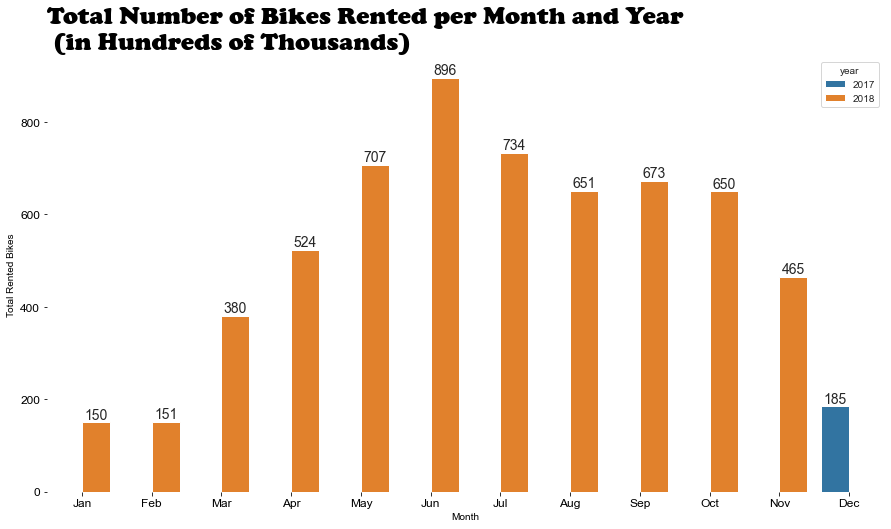

In [57]:
# Analyzing the total rented bikes distribution among months.
from itertools import zip_longest


fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
sns.barplot(x='month_name',y='rented_bike_count',data=bike_month_bar_chart,hue='year',order=['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ax=ax)
#ax.set_title('Total Rented Bikes by Month and Year')
csfont = {'fontname':'Cooper Black'} #others fonts to test Arial Black, Bebas Neue, Oswald, Impact
ax.set_title("Total Number of Bikes Rented per Month and Year \n (in Hundreds of Thousands)", 
             fontdict = {'fontsize':25,
                         'fontweight':'extra bold',
                         'fontstretch':'extra-expanded',
                        'variant': 'small-caps'}, 
             **csfont, loc='left', pad=8.0)
ax.set_xlabel('Month')
ax.set_ylabel("Total Rented Bikes")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
label_size = 12
ax.tick_params(labelsize=label_size)

#Checking the Height's values
#for p in ax.patches:
#    print(p.get_height())

for p, v in zip_longest(ax.patches, bike_month_bar_chart['rented_bike_count'],fillvalue=None):
    height = p.get_height()
    #print(height)
    posx = p.get_x() + p.get_width() / 2
    posy = height + 1
    #Checking the position and values
    #print(f' posição do x {posx} posição do y {posy} e valor {v}')
    
  
    if v != 0.0 :
        ax.text(posx, posy, v, ha='center', va='bottom', fontdict={'fontsize':14})

plt.savefig("../documents/charts/Total Rented Bikes by Month and Year.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)
plt.show()

## 4.2 A Bar Plot to analyze the total bikes rented by season

### 4.2.1 Creating a dataframe groupying values by season and month

In [58]:
df_seoulbike_treated_per_seasons = (df_seoulbike_treated
 .groupby(['seasons','month_name'])['rented_bike_count']
 .agg('sum')
 .reset_index()
                                    
                                    
)

In [59]:
df_seoulbike_treated_per_seasons

,seasons,month_name,rented_bike_count
0,Autumn,Apr,0
1,Autumn,Aug,0
2,Autumn,Dec,0
3,Autumn,Feb,0
4,Autumn,Jan,0
5,Autumn,Jul,0
6,Autumn,Jun,0
7,Autumn,Mar,0
8,Autumn,May,0
9,Autumn,Nov,465715


In [60]:
df_seoulbike_treated_per_seasons =(
        pd.DataFrame(df_seoulbike_treated_per_seasons)
     .reset_index()
     .loc[df_seoulbike_treated_per_seasons['rented_bike_count'] > 0]
    
    )
df_seoulbike_treated_per_seasons

,index,seasons,month_name,rented_bike_count
9,9,Autumn,Nov,465715
10,10,Autumn,Oct,650675
11,11,Autumn,Sep,673612
12,12,Spring,Apr,524227
19,19,Spring,Mar,380594
20,20,Spring,May,707088
25,25,Summer,Aug,651887
29,29,Summer,Jul,734460
30,30,Summer,Jun,896887
38,38,Winter,Dec,185330


#### 4.2.2.1 Grouping by Season

In [61]:
df_seoulbike_treated_per_seasons_only = (df_seoulbike_treated
 .groupby(['seasons'])['rented_bike_count']
 .agg('sum')
 .reset_index()
                                    
                                    
)
df_seoulbike_treated_per_seasons_only

,seasons,rented_bike_count
0,Autumn,1790002
1,Spring,1611909
2,Summer,2283234
3,Winter,487169


#### 4.2.2.2 Dividing the 'rented_bikes_count' columns per 1000 to display the number as thousands

In [62]:
df_seoulbike_treated_per_seasons_only['rented_bike_count'] = df_seoulbike_treated_per_seasons_only['rented_bike_count'].apply(lambda x: x/1000)

In [63]:
df_seoulbike_treated_per_seasons_only

,seasons,rented_bike_count
0,Autumn,1790.002
1,Spring,1611.909
2,Summer,2283.234
3,Winter,487.169


In [64]:
## DataFrame as int to build the chart
df_seoulbike_treated_per_seasons_only['rented_bike_count'] = df_seoulbike_treated_per_seasons_only['rented_bike_count'].astype('int')

In [65]:
df_seoulbike_treated_per_seasons_only

,seasons,rented_bike_count
0,Autumn,1790
1,Spring,1611
2,Summer,2283
3,Winter,487


#### 4.2.2.3 Developing the Bar Chart of Rented bikes by season of the year

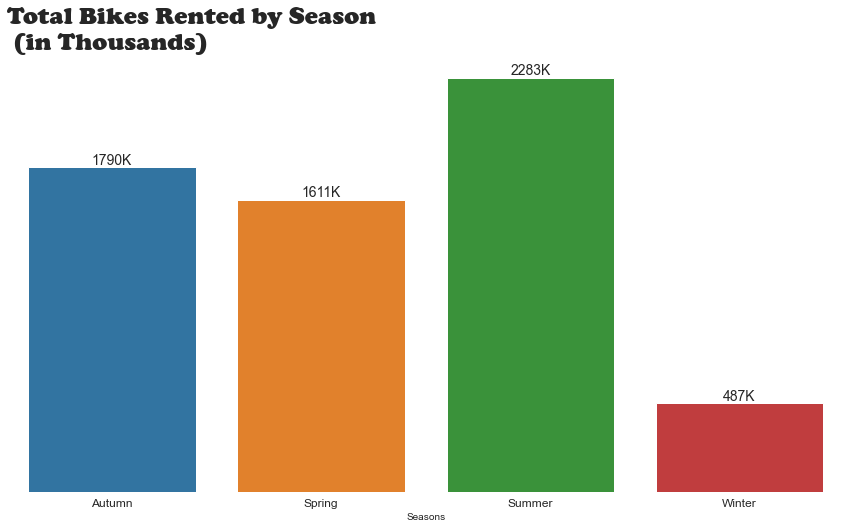

In [66]:

fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='seasons',y='rented_bike_count',
            data=df_seoulbike_treated_per_seasons_only[['seasons','rented_bike_count']],
            ax=ax)

csfont = {'fontname':'Cooper Black'} #others fonts to test Arial Black, Bebas Neue, Oswald, Impact
ax.set_title('Total Bikes Rented by Season \n (in Thousands)', 
             fontdict = {'fontsize':25,
                         'fontweight':'extra bold',
                         'fontstretch':'extra-expanded',
                        'variant': 'small-caps'}, 
             **csfont, loc='left', pad=8.0)
ax.set_xlabel('Seasons')
ax.set_ylabel("Total Rented Bikes")
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
label_size = 12
ax.tick_params(labelsize=label_size)


for p, v in zip(ax.patches, df_seoulbike_treated_per_seasons_only['rented_bike_count']):
    height = p.get_height()
    posx = p.get_x() + p.get_width() / 2
    posy = height + 1
    v = f'{v}K'
        
    ax.text(posx, posy, v, ha='center', va='bottom', fontdict={'fontsize':14})
    
        
plt.savefig("../documents/charts/Total Bikes Rented by Season.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)

plt.show()

## 5. Detecting Outliers

### 5.1 Creating the charts

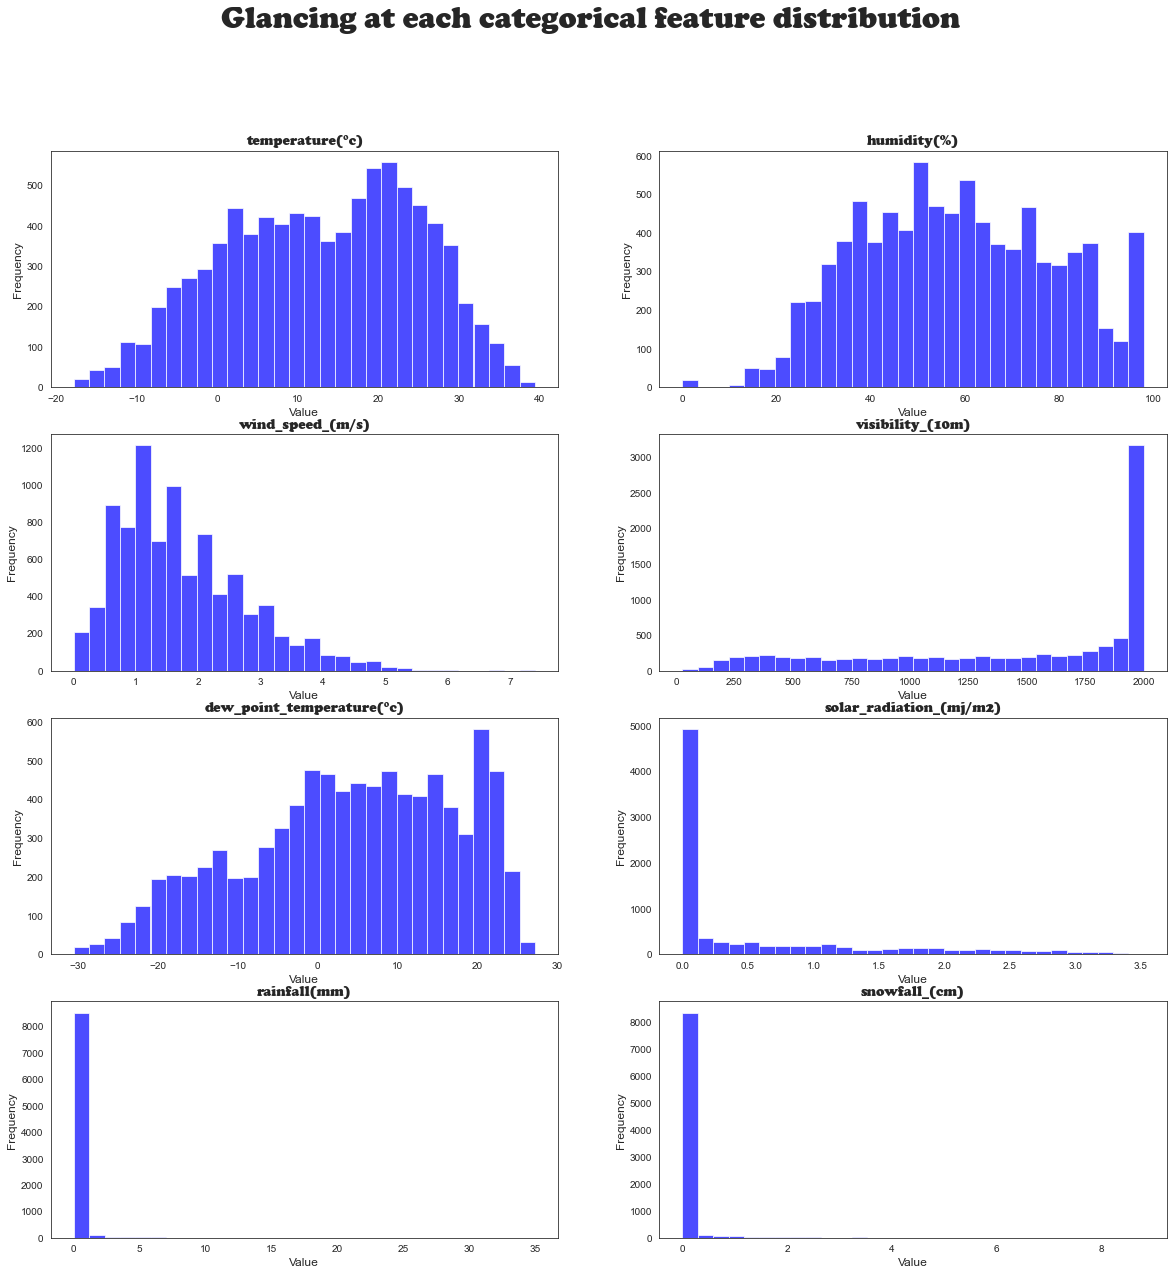

In [67]:
#First let's build a histogram to each numerical feature in our dataset.

featuare =["temperature(°c)","humidity(%)","wind_speed_(m/s)",
     "visibility_(10m)", "dew_point_temperature(°c)",
     "solar_radiation_(mj/m2)","rainfall(mm)","snowfall_(cm)"
    ]
    

# Creating a figure and subplots for each feature
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))  

# Iterating over each feature
for i, attribute in enumerate(featuare):  
    row, col = divmod(i, 2)
    axes[row, col].hist(df_seoulbike_treated[attribute], bins=30, color="blue", alpha=0.7)
    axes[row, col].set_title(attribute, fontsize=14, fontname = 'Cooper Black')
    
# Adjusting label and titles
for ax in axes.flat:
    ax.set(xlabel="Value", ylabel="Frequency")
    ax.set_xlabel("Value", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

    

fig.suptitle('Glancing at each categorical feature distribution', fontsize=30, fontname = 'Cooper Black')
plt.savefig("../documents/charts/Glancing at each categorical feature distribution.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)

# Oculte os rótulos do eixo x e y nos subplots superiores e à direita
#for ax in axes.flat:
#    ax.label_outer()

# Showing the chart
plt.show()

### 5.2.1 Tukey's Method

#### 5.2.1.2 Calculating the Mild Outliers

##### 5.2.1.2.1 Mild Outliers - temperature °c

In [68]:
df_seoulbike_treated["temperature(°c)"].describe()

count    8760.000000
mean             inf
std        11.945312
min       -17.796875
25%         3.500000
50%        13.703125
75%        22.500000
max        39.406250
Name: temperature(°c), dtype: float64

In [69]:
temp_Q1 = df_seoulbike_treated["temperature(°c)"].quantile(0.25)
temp_Q3 = df_seoulbike_treated["temperature(°c)"].quantile(0.75)

print(f"The first Quantile of Temperature is {temp_Q1}")
print(f"The Thrid Quantile of Temperature is {temp_Q3}")

The first Quantile of Temperature is 3.5
The Thrid Quantile of Temperature is 22.5


In [70]:
temp_IQR =temp_Q3-temp_Q1
temp_IQR

19.0

In [71]:
#Calculating the Mild Outliers

temp_lower_bound = temp_Q1-(1.5 * temp_IQR)
temp_upper_bound = temp_Q3+(1.5 * temp_IQR)
print(f"The Temperature Mild Lower Bound is {temp_lower_bound}")
print(f"The Temperature Mild Upper Bound is {temp_upper_bound}")

The Temperature Mild Lower Bound is -25.0
The Temperature Mild Upper Bound is 51.0


In [72]:
#Nowlet's find the real outliers

idxIQMild = np.where((df_seoulbike_treated["temperature(°c)"]<temp_lower_bound)|(df_seoulbike_treated["temperature(°c)"]>temp_upper_bound))
print(f" Indexes to exclude {idxIQMild}, the length of idx is {len(idxIQMild[0])}." )

 Indexes to exclude (array([], dtype=int64),), the length of idx is 0.


##### 5.2.1.2.1 A Box plot for temperature outliers

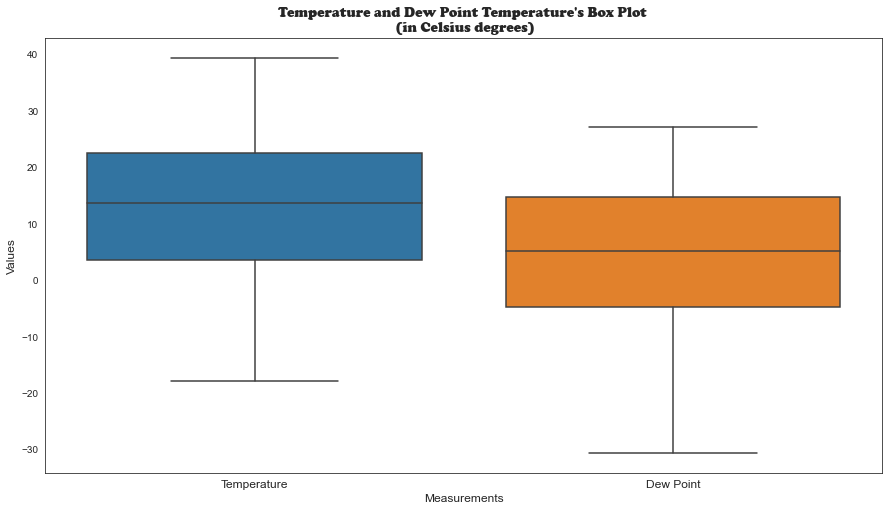

In [77]:
#Hun that means that we dont have outliers here, Let's see it in detail: 

celsius = []
for mensure in float_type:
    if '(°c)' in mensure:
        celsius.append(mensure)
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for temperature outliers
sns.boxplot(data=df_seoulbike_treated[celsius])
ax.set_title("Temperature and Dew Point Temperature's Box Plot \n (in Celsius degrees)", fontsize=14, fontname = 'Cooper Black')
ax.set_xlabel('Measurements', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_xticklabels(['Temperature', 'Dew Point'], fontsize=12)

plt.savefig("../documents/charts/Temperature Box Plot.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)

plt.show()

##### 5.2.1.2.2 A Box plot for Humidity outliers

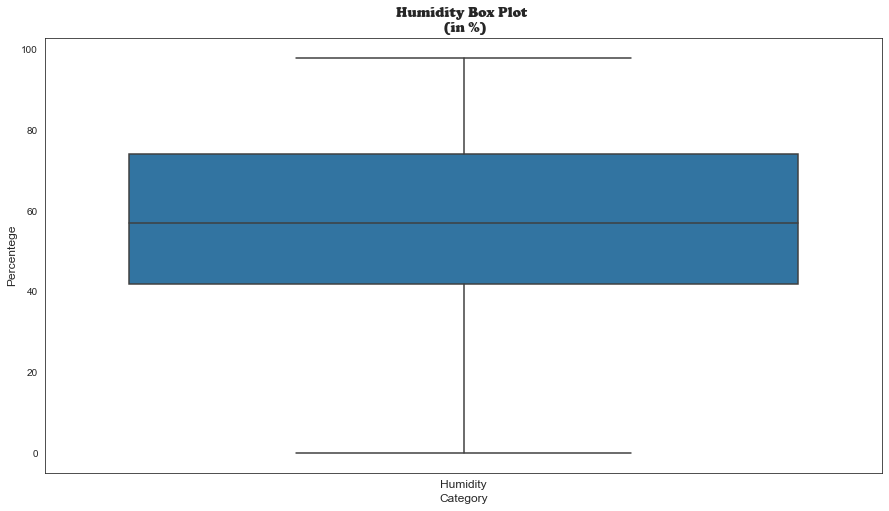

In [83]:
#OK good lets check the humidty

fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Humidity Outliers
sns.boxplot(data=df_seoulbike_treated['humidity(%)'])
ax.set_title('Humidity Box Plot \n (in %)',fontsize=14, fontname = 'Cooper Black')
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Percentege', fontsize=12)
ax.set_xticklabels(["Humidity"], fontsize=12)

plt.savefig("../documents/charts/Humidity Box Plot.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)

plt.show()

##### 5.2.1.2.3 A Box plot for Wind Speed outliers

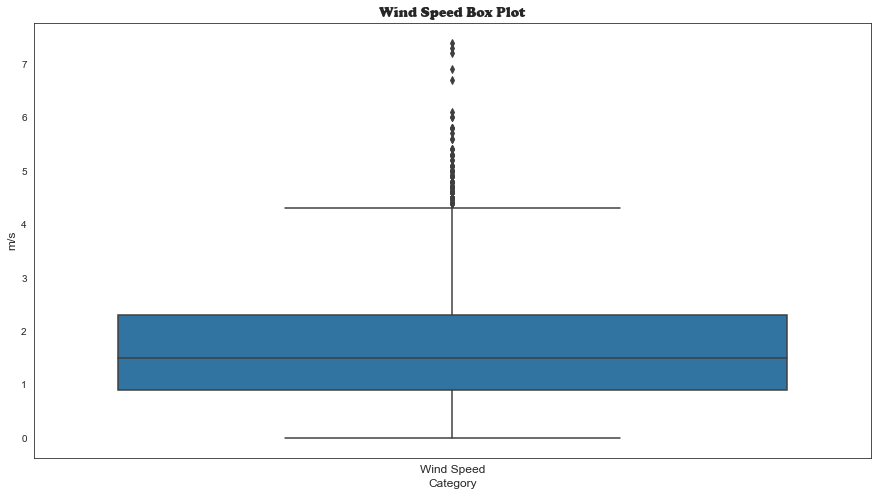

In [84]:
#Wind Speed
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Wind Speed Outliers
sns.boxplot(data=df_seoulbike_treated['wind_speed_(m/s)'])
ax.set_title('Wind Speed Box Plot',fontsize=14, fontname = 'Cooper Black')
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('m/s', fontsize=12)
ax.set_xticklabels(["Wind Speed"], fontsize=12)
plt.savefig("../documents/charts/Wind Speed Box Plot.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)

plt.show()

###### 5.2.1.2.3.1  Identifying Wind Speed outliers



In [76]:
df_seoulbike_treated['wind_speed_(m/s)'].describe()

count    8760.000000
mean        1.724905
std         1.036305
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: wind_speed_(m/s), dtype: float64

In [77]:
wind_speed_Q1 = df_seoulbike_treated['wind_speed_(m/s)'].quantile(0.25)
wind_speed_Q3 = df_seoulbike_treated['wind_speed_(m/s)'].quantile(0.75)

print(f"The first Quantile of Wind_Speed is {wind_speed_Q1}")
print(f"The Thrid Quantile of Wind_Speed is {wind_speed_Q3}")

The first Quantile of Wind_Speed is 0.8999999761581421
The Thrid Quantile of Wind_Speed is 2.299999952316284


In [78]:
wind_speed_IQR = wind_speed_Q3-wind_speed_Q1
wind_speed_IQR

1.399999976158142

###### 5.2.1.2.3.1.2  Calculating the Wind speed Mild Outliers

In [79]:
#Calculating the Mild Outliers

mild_lower_bound = wind_speed_Q1-(1.5 * wind_speed_IQR)
mild_upper_bound = wind_speed_Q3+(1.5 * wind_speed_IQR)
print(f"The Mild Lower Bound is {mild_lower_bound}")
print(f"The Mild Upper Bound is {mild_upper_bound}")

The Mild Lower Bound is -1.199999988079071
The Mild Upper Bound is 4.399999916553497


###### 5.2.1.2.3.1.3  Calculating the Wind speed Extreme Outliers


In [80]:
extreme_lower_bound = wind_speed_Q1-(3 * wind_speed_IQR)
extreme_upper_bound = wind_speed_Q3+(3 * wind_speed_IQR)
print(f"The Extreme Lower Bound is {extreme_lower_bound}")
print(f"The Extreme Upper Bound is {extreme_upper_bound}")

The Extreme Lower Bound is -3.299999952316284
The Extreme Upper Bound is 6.4999998807907104


In [81]:
outliers_lied_upper = df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound

###### 5.2.1.2.3.1.4 Getting the total number of Outliers

In [82]:
#Now let's determine the number of outlier thar are lie outside of the mild_upper_bound

number_of_outliers_lied_upper=(df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound).sum()
number_of_outliers_lied_upper

144

###### 5.2.1.2.3.1.5 Getting the percentage of Outliers

In [83]:
#Calculating the percentage of wind_speed lied over the Mild Upper Bound
(df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound).mean()*100

1.643835616438356

###### 5.2.1.2.3.1.6 Pointing out the Wind Speed Outliers

In [84]:
#So now we'll identify which ones they are.
wind_speed_outliers= df_seoulbike_treated[df_seoulbike_treated['wind_speed_(m/s)']>mild_upper_bound]
wind_speed_outliers

,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),seasons,holiday,functioning_day,day_of_week,year,month,month_name
82,311,10,-1.099609,40,4.5,2000,-13.000000,0.64,0.0,0.0,Winter,0,1,0,2017,12,Dec
84,393,12,-0.300049,38,4.8,1823,-12.898438,1.11,0.0,0.0,Winter,0,1,0,2017,12,Dec
85,391,13,0.000000,30,5.4,1938,-15.500000,1.17,0.0,0.0,Winter,0,1,0,2017,12,Dec
86,338,14,0.099976,27,4.5,2000,-16.703125,1.09,0.0,0.0,Winter,0,1,0,2017,12,Dec
87,341,15,-0.099976,25,5.8,2000,-17.796875,0.88,0.0,0.0,Winter,0,1,0,2017,12,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7933,1118,13,10.601562,38,4.6,2000,-3.099609,1.63,0.0,0.0,Autumn,0,1,5,2018,10,Oct
7937,1176,17,9.500000,34,5.7,2000,-5.601562,0.45,0.0,0.0,Autumn,0,1,5,2018,10,Oct
7985,1274,17,10.000000,43,4.9,2000,-2.000000,0.43,0.0,0.0,Autumn,0,1,0,2018,10,Oct
8242,0,10,11.296875,68,4.7,1984,5.500000,0.44,0.0,0.0,Autumn,0,0,4,2018,11,Nov


In [85]:
wind_speed_outliers.describe()

,rented_bike_count,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm)
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,540.416667,7.562500,43.159722,4.942362,1670.097222,-5.160156,1.204167,0.165278,0.086806
std,470.266678,11.781250,19.727041,0.545494,501.575508,13.898438,1.036060,1.116333,0.254263
min,0.000000,-14.500000,14.000000,4.500000,214.000000,-30.593750,0.000000,0.000000,0.000000
25%,190.750000,-2.024902,30.000000,4.600000,1560.250000,-17.726562,0.160000,0.000000,0.000000
50%,314.000000,5.298828,37.000000,4.800000,1928.500000,-6.300781,1.090000,0.000000,0.000000
75%,939.500000,18.644531,53.000000,5.000000,2000.000000,5.125977,1.890000,0.000000,0.000000
max,2068.000000,33.312500,96.000000,7.400000,2000.000000,23.093750,3.320000,13.000000,1.000000


###### 5.2.1.2.3.1.7 A chart to identify wind Speed Outliers by season and month

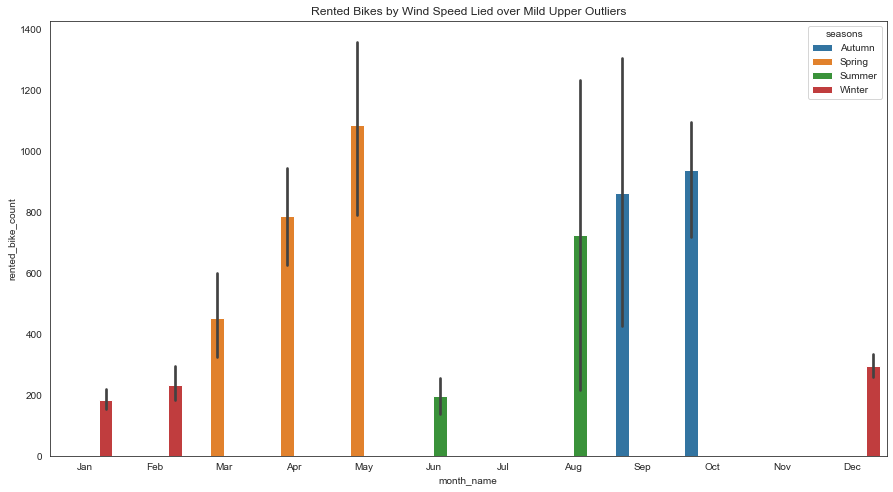

In [86]:
#let's see in which season that happened

fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month_name',y='rented_bike_count',data=wind_speed_outliers[['month_name','rented_bike_count','seasons']],hue='seasons',order=['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec'],ax=ax)

ax.set_title('Rented Bikes by Wind Speed Lied over Mild Upper Outliers')
plt.show()

Interresting, we can see that are some months that we don't have rented bikes with a over lied speed wind. 

#### 5.2.1.3 A Box plot for Solar Radiation outliers

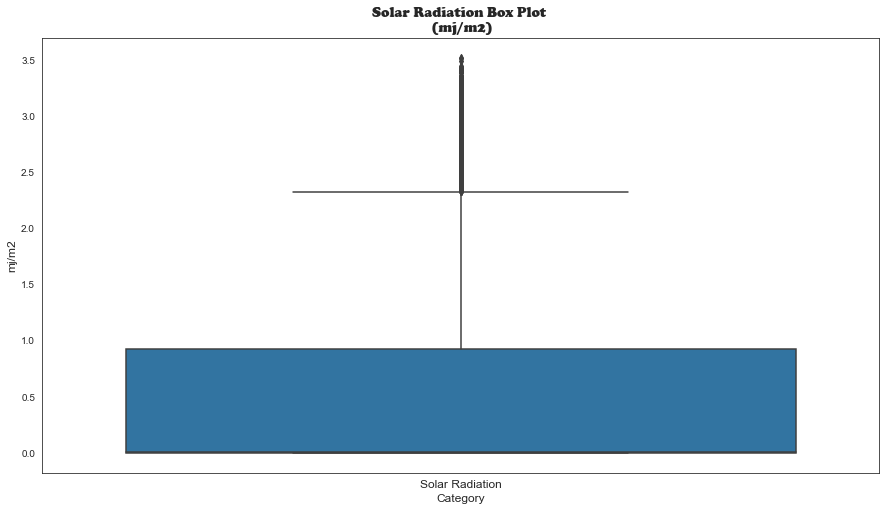

In [91]:


fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated['solar_radiation_(mj/m2)'])
ax.set_title('Solar Radiation Box Plot \n (mj/m2)',fontsize=14, fontname = 'Cooper Black')
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('mj/m2', fontsize=12)
ax.set_xticklabels(["Solar Radiation"], fontsize=12)
plt.savefig("../documents/charts/SolarRadiationBoxPlot.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)

plt.show()

#### 5.2.1.4 A Box plot for Visibility outliers

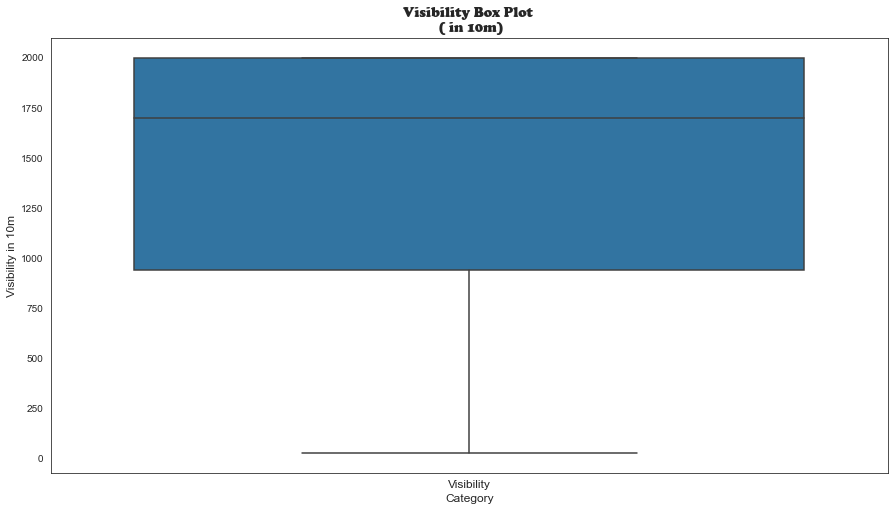

In [89]:



fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated['visibility_(10m)'])
ax.set_title('Visibility Box Plot \n ( in 10m)',fontsize=14, fontname = 'Cooper Black')
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Visibility in 10m', fontsize=12)
ax.set_xticklabels(["Visibility"], fontsize=12)
plt.savefig("../documents/charts/Visibility Box Plot.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)

plt.show()

#### 5.2.1.5 A Box plot for Rainfall outliers

In [89]:
df_seoulbike_treated['rainfall(mm)'].value_counts()

0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
7.3        1
24.0       1
7.5        1
9.1        1
1.4        1
Name: rainfall(mm), Length: 61, dtype: int64

<AxesSubplot:>

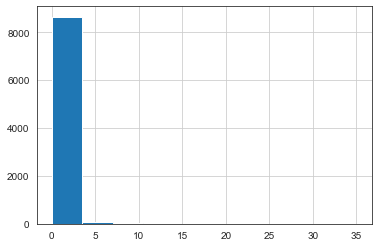

In [90]:
df_seoulbike_treated['rainfall(mm)'].hist()

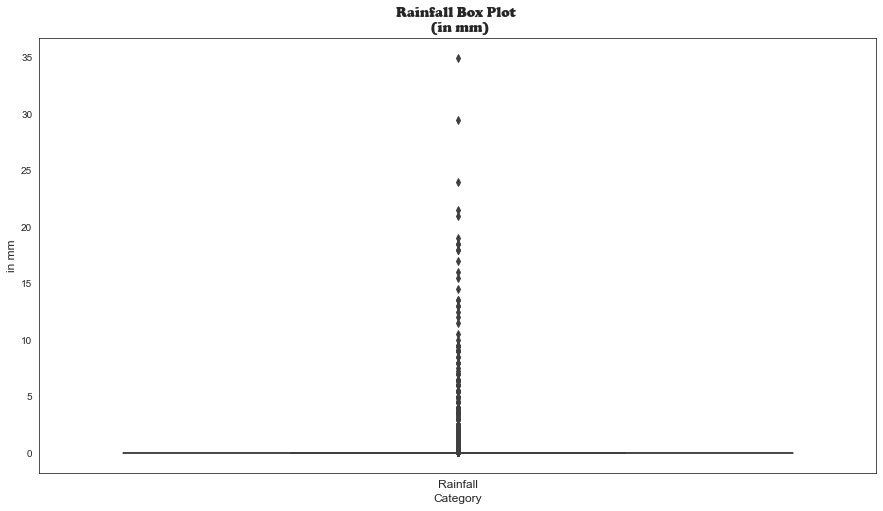

In [93]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for xxx _outliers
sns.boxplot(data=df_seoulbike_treated['rainfall(mm)'])
ax.set_title('Rainfall Box Plot \n (in mm)',fontsize=14, fontname = 'Cooper Black')
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('in mm', fontsize=12)
ax.set_xticklabels(["Rainfall"], fontsize=12)

plt.savefig("../documents/charts/Rainfall Box Plot.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)

plt.show()

# 6 Applying the Binning Technique


## 6.1 Binning the Wind Category

### 6.1.1 Creating a new Dataframe with the Wind Category feature

In [92]:
### to deal with thi outlier I will use the binning tecnic. Considering that in fall season the wind tends to be strong.
### for exemple:

#Winds of 1.5 m/s would be attributed to the “weak” bin.
#Winds of 3.5 m/s would be assigned to the “moderate” bin.
#Winds of 5 m/s would be attributed to the “strong” bin.

#I will based on the Beaufort scale

#We know that this dataset has the max value of wind as 7.4. I will consider it as our max value here.
#I will consider that any value over the 13.8 is a considerable wind just like beaufort scale.

# Defining the bins and labels for binning tecnic
bins = [0.0, 1.5, 3.3, 5.4,7.9,10.7,13.8, float('inf')]
labels = ['1_calm', '2_plowing', '3_light breeze', '4_weak breeze','5_moderate breeze','6_strong breeze','7_wind']

# Creating a new column 'wind_category' based on the column 'wind_speed'
df_seoulbike_treated['wind_category'] = pd.cut(df_seoulbike_treated['wind_speed_(m/s)'], bins=bins, labels=labels,include_lowest=True)

# Displaying the resulting dataframe
checking = ['wind_speed_(m/s)','wind_category']
df_seoulbike_treated[checking]


,wind_speed_(m/s),wind_category
0,2.2,2_plowing
1,0.8,1_calm
2,1.0,1_calm
3,0.9,1_calm
4,2.3,2_plowing
...,...,...
8755,2.6,2_plowing
8756,2.3,2_plowing
8757,0.3,1_calm
8758,1.0,1_calm


#### 6.1.2.1 Checking the unique values of the Wind Category feature

In [93]:
calm = df_seoulbike_treated[df_seoulbike_treated['wind_speed_(m/s)']<1.5]
calm['wind_category'].unique()

['1_calm']
Categories (1, object): ['1_calm']

In [94]:
plowing = df_seoulbike_treated[(df_seoulbike_treated['wind_speed_(m/s)'] > 1.5) & (df_seoulbike_treated['wind_speed_(m/s)'] <= 3.3)]
plowing['wind_category'].unique()

['2_plowing']
Categories (1, object): ['2_plowing']

In [95]:
light_breeze = df_seoulbike_treated[(df_seoulbike_treated['wind_speed_(m/s)'] > 3.3) & (df_seoulbike_treated['wind_speed_(m/s)'] <= 5.4)]
light_breeze['wind_category'].unique()

['3_light breeze', '4_weak breeze']
Categories (2, object): ['3_light breeze' < '4_weak breeze']

##### 6.1.1.1.1 Analysing the binning's impact

In [96]:
#Counting how many values we have before
len(df_seoulbike_treated['wind_speed_(m/s)'].unique())

65

In [97]:
df_seoulbike_treated['wind_speed_(m/s)'].value_counts()

1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
6.7      1
5.7      1
7.2      1
7.3      1
6.9      1
Name: wind_speed_(m/s), Length: 65, dtype: int64

<AxesSubplot:>

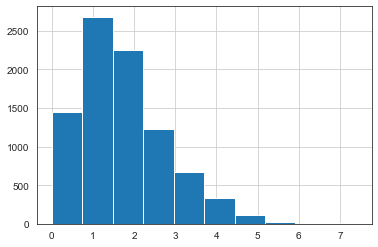

In [98]:
df_seoulbike_treated['wind_speed_(m/s)'].hist()

In [99]:
#Now we have 7 categories before we had 65 unique numbers

In [100]:
#Let's do the same tecnic so visibility and solar radiation

In [101]:
#let's check the columns name again 
df_seoulbike_treated.columns

Index(['rented_bike_count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind_speed_(m/s)', 'visibility_(10m)', 'dew_point_temperature(°c)',
       'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)', 'seasons',
       'holiday', 'functioning_day', 'day_of_week', 'year', 'month',
       'month_name', 'wind_category'],
      dtype='object')

## 6.2 Binning the Solar Radiation Category

A medida de radiação solar que você possui, expressa em megajoules por metro quadrado (MJ/m²), é uma unidade comum para quantificar a quantidade de energia solar que atinge uma determinada área. Para classificar esses valores, podemos criar intervalos ou “bins” para determinar quando a radiação solar é fraca, moderada ou forte.

Vamos criar algumas categorias para os valores de radiação solar. Estas categorias podem variar dependendo do contexto e dos padrões específicos do projeto:

__Fraca__:  
Valores abaixo de 0.5 MJ/m² podem ser considerados fracos. Essa radiação solar é insuficiente para muitas aplicações, como geração de energia solar ou aquecimento solar.

__Moderada__:  
Valores entre 0.5 MJ/m² e 1.0 MJ/m² podem ser classificados como moderados. Essa faixa indica uma quantidade razoável de radiação solar.

__Forte__:  
Valores acima de 1.0 MJ/m² são considerados fortes. Essa radiação solar é ideal para a maioria das aplicações solares, como carregamento de baterias solares, aquecimento de água e geração de eletricidade.
Lembre-se de que esses intervalos são apenas uma sugestão inicial. Se você estiver trabalhando em um projeto específico, consulte as diretrizes ou padrões relevantes para determinar os intervalos mais adequados para sua aplicação. Além disso, considere ajustar esses limites com base nas necessidades específicas do seu projeto.

### 6.2.1 Creating a new Dataframe with the Solar Radiaton Category feature

In [102]:
## Let's do the binning tecnic to solar radiation:

#We can create intervals or “bins” to determine when solar radiation is weak, moderate or strong

#Weak:
#Values below 0.5 MJ/m² can be considered weak. This solar radiation is insufficient for many applications, such as solar energy generation or solar heating.
#Moderate:
#Values between 0.5 MJ/m² and 1.0 MJ/m² can be classified as moderate. This range indicates a reasonable amount of solar radiation.
#Strong:
#Values above 1.0 MJ/m² are considered strong. This solar radiation is ideal for most solar applications, such as charging solar batteries, heating water and generating electricity.


# Defining the bins and labels for binning tecnic
bins_solar_radiation = [0.0, 0.5, 1.0,  float('inf')]
labels_solar_radiation = ['1_weak', '2_moderate', '3_strong']

# Crie uma nova coluna 'wind_category' com base na coluna 'wind_speed'
df_seoulbike_treated['solar_radiation_category'] = pd.cut(df_seoulbike_treated['solar_radiation_(mj/m2)'], bins=bins_solar_radiation, labels=labels_solar_radiation,include_lowest=True)

# Exiba o dataframe resultante
checking_solar_radiation = ['solar_radiation_(mj/m2)','solar_radiation_category']
df_seoulbike_treated[checking_solar_radiation]

,solar_radiation_(mj/m2),solar_radiation_category
0,0.0,1_weak
1,0.0,1_weak
2,0.0,1_weak
3,0.0,1_weak
4,0.0,1_weak
...,...,...
8755,0.0,1_weak
8756,0.0,1_weak
8757,0.0,1_weak
8758,0.0,1_weak


#### 6.2.1.1 Checking the unique values of the Solar Radiaton Category feature

In [103]:
#checking if we have any NAN values
df_seoulbike_treated[checking_solar_radiation].isna().sum()

solar_radiation_(mj/m2)     0
solar_radiation_category    0
dtype: int64

In [104]:
weak = df_seoulbike_treated[(df_seoulbike_treated['solar_radiation_(mj/m2)'] < 0.5)]
moderate = df_seoulbike_treated[(df_seoulbike_treated['solar_radiation_(mj/m2)'] > 0.5) & (df_seoulbike_treated['solar_radiation_(mj/m2)'] <= 1.0)]
strong = df_seoulbike_treated[(df_seoulbike_treated['solar_radiation_(mj/m2)'] > 1.5)]


weak['solar_radiation_category'].unique()


['1_weak']
Categories (1, object): ['1_weak']

In [105]:

moderate['solar_radiation_category'].unique()



['2_moderate']
Categories (1, object): ['2_moderate']

In [106]:
strong['solar_radiation_category'].unique()

['3_strong']
Categories (1, object): ['3_strong']

## 6.3 Binning the Visibility Category

A visibilidade está relacionada à clareza e à distância que podemos enxergar em condições climáticas. Embora não haja uma tabela específica como a Beaufort, a Organização Meteorológica Mundial (OMM) define categorias de visibilidade com base na distância visual:
__Excelente__: Mais de 10 km

__Boa__: De 5 a 10 km

__Moderada__: De 1 a 5 km

__Ruim__: De 500 m a 1 km

__Muito Ruim__: Menos de 500 m.


In [107]:
df_seoulbike_treated['visibility_(10m)'].unique()

array([2000, 1928, 1996, ...,  220,  524, 1688], dtype=int64)

In [108]:
df_seoulbike_treated['visibility_(10m)'].max()

2000

In [109]:
df_seoulbike_treated['visibility_(10m)'].min()

27

### 6.3.1 Creating a new Dataframe with the Visibility Category feature

In [110]:
#Excelent: More then 10000 m 
#Good: from 5000 to 10000 m 
#Moderate: De 1000 a 5000 m 
#Bad: De 500 m a 1000 m 
#Very Bad: Less then 500 m

# Defining the bins and labels for binning tecnic
bins_visibility = [0, 500, 1000,5000,10000, float('inf')] 
labels_visibility = ['1_very bad', '2_bad', '3_moderate','4_good','5_excelent']

# Crie uma nova coluna 'wind_category' com base na coluna 'wind_speed'
df_seoulbike_treated['visibility_category'] = pd.cut(df_seoulbike_treated['visibility_(10m)'], bins=bins_visibility, labels=labels_visibility,include_lowest=True)

# Exiba o dataframe resultante
checking_visibility = ['visibility_(10m)','visibility_category']
df_seoulbike_treated[checking_visibility]


,visibility_(10m),visibility_category
0,2000,3_moderate
1,2000,3_moderate
2,2000,3_moderate
3,2000,3_moderate
4,2000,3_moderate
...,...,...
8755,1894,3_moderate
8756,2000,3_moderate
8757,1968,3_moderate
8758,1859,3_moderate


#### 6.3.1.1 Checking the unique values of the Visibility Category feature

In [111]:
very_bad = df_seoulbike_treated[(df_seoulbike_treated['visibility_(10m)'] < 500)]
bad = df_seoulbike_treated[(df_seoulbike_treated['visibility_(10m)'] > 500) & (df_seoulbike_treated['visibility_(10m)'] <= 1000)]
moderate = df_seoulbike_treated[(df_seoulbike_treated['visibility_(10m)'] > 1000) & (df_seoulbike_treated['solar_radiation_(mj/m2)']<= 5000)]
good = df_seoulbike_treated[(df_seoulbike_treated['visibility_(10m)'] > 5000) & (df_seoulbike_treated['solar_radiation_(mj/m2)']<= 10000)]
very_good = df_seoulbike_treated[(df_seoulbike_treated['visibility_(10m)'] > 10000)]


very_bad['visibility_category'].unique()



['1_very bad']
Categories (1, object): ['1_very bad']

In [112]:
bad['visibility_category'].unique()

['2_bad']
Categories (1, object): ['2_bad']

In [113]:
moderate['visibility_category'].unique()

['3_moderate']
Categories (1, object): ['3_moderate']

In [114]:
good['visibility_category'].unique()

[], Categories (0, object): []

In [115]:
good[checking_visibility]

,visibility_(10m),visibility_category


In [116]:
#Let's check if we have NAN values
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   rented_bike_count          8760 non-null   int64   
 1   hour                       8760 non-null   category
 2   temperature(°c)            8760 non-null   float16 
 3   humidity(%)                8760 non-null   int64   
 4   wind_speed_(m/s)           8760 non-null   float32 
 5   visibility_(10m)           8760 non-null   int64   
 6   dew_point_temperature(°c)  8760 non-null   float16 
 7   solar_radiation_(mj/m2)    8760 non-null   float32 
 8   rainfall(mm)               8760 non-null   float64 
 9   snowfall_(cm)              8760 non-null   float32 
 10  seasons                    8760 non-null   category
 11  holiday                    8760 non-null   category
 12  functioning_day            8760 non-null   category
 13  day_of_week                8760 n

<AxesSubplot:>

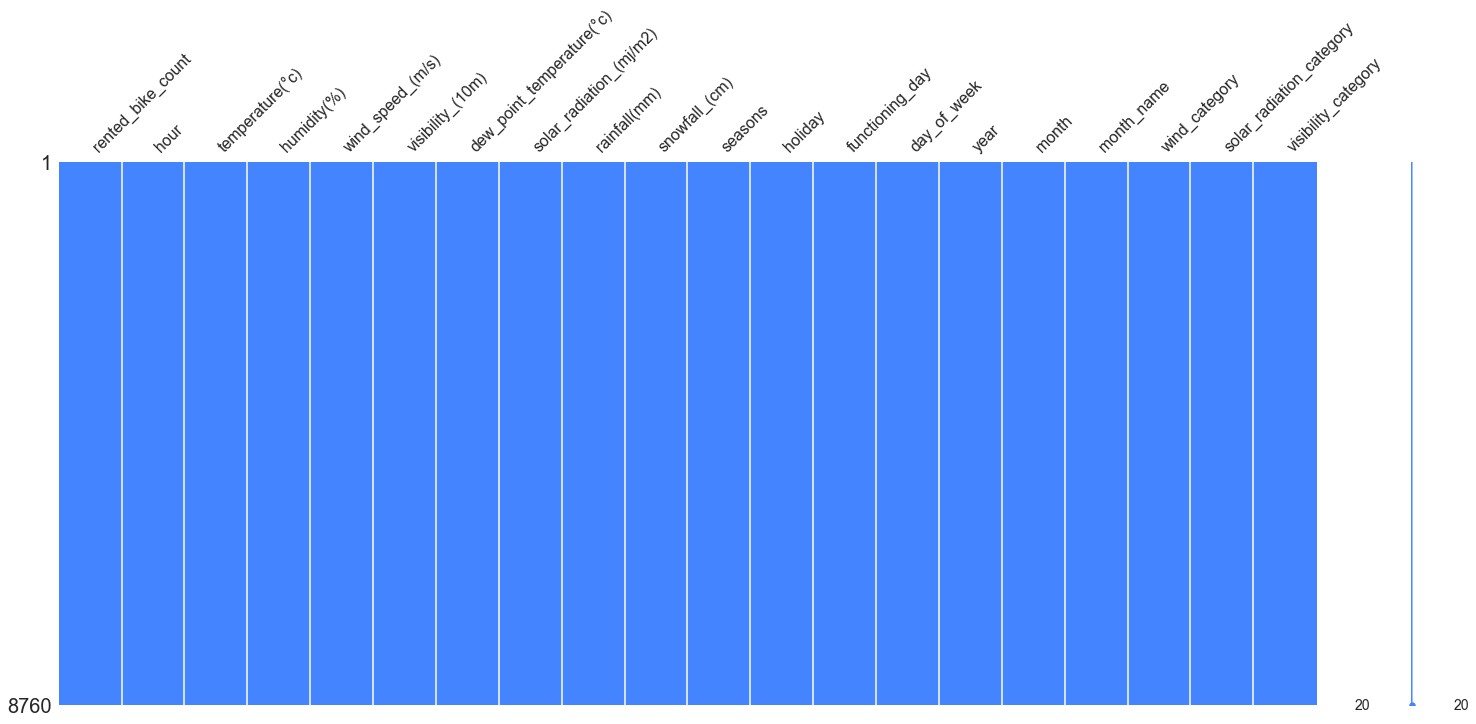

In [132]:
msno.matrix(df_seoulbike_treated, color=(0.27, 0.52, 1.0), fontsize=16)

Intensity-based classification: This classification considers the amount of rain in millimeters per hour (mm/h). 
Here are some categories based on these criteria: 
Light rain: below 5.0 mm/h.  
Moderate rain: between 5.0 and 25 mm/h.  
Heavy rain: between 25.1 and 50 mm/h. Very heavy rain: above 50.0 mm/h12.  
Other classifications: In addition to intensity, we can also consider the duration of the rain: Drizzle: when the intensity is 0.1 mm/h.  
Light rain: between 0.2 mm/h and 9.9 mm/h.  
Moderate rain: between 10 mm/h and 19 mm/h.  
Heavy rain: between 20 mm/h and 60 mm/h3.  

In [134]:
#0.0mm  no rain = <0
#0.1mm to 0.2- drizzle
#From 0.2mm to 9.9mm/h - light rain
#From 10 to 19mm/h - moderate rain
#From 20mm to 60mm/h - heavy rain



# Defining the bins and labels for binning tecnic
bins_visibility = [-1.0,0.01,0.199, 9.9,19.99, float('inf')] 
labels_visibility = ['1_no rain','2_drizzle', '3_light rain', '4_moderate rain','5_heavy rain']

# Crie uma nova coluna 'wind_category' com base na coluna 'wind_speed'
df_seoulbike_treated['rainfall_category'] = pd.cut(df_seoulbike_treated['rainfall(mm)'], bins=bins_visibility, labels=labels_visibility,include_lowest=True)

# Exiba o dataframe resultante
checking_rainfall = ['rainfall(mm)','rainfall_category']
df_seoulbike_treated[checking_rainfall]

,rainfall(mm),rainfall_category
0,0.0,1_no rain
1,0.0,1_no rain
2,0.0,1_no rain
3,0.0,1_no rain
4,0.0,1_no rain
...,...,...
8755,0.0,1_no rain
8756,0.0,1_no rain
8757,0.0,1_no rain
8758,0.0,1_no rain


In [135]:
no_rain = df_seoulbike_treated[(df_seoulbike_treated['rainfall(mm)'] < 0.01)] 
drizzle = df_seoulbike_treated[(df_seoulbike_treated['rainfall(mm)'] >= 0.01) & (df_seoulbike_treated['rainfall(mm)'] < 0.2 )]
light_rain = df_seoulbike_treated[(df_seoulbike_treated['rainfall(mm)'] >= 0.2) & (df_seoulbike_treated['rainfall(mm)'] < 10)]
moderate_rain = df_seoulbike_treated[(df_seoulbike_treated['rainfall(mm)'] >= 10) & (df_seoulbike_treated['rainfall(mm)']< 20)]
heavy_rain = df_seoulbike_treated[(df_seoulbike_treated['rainfall(mm)'] >= 20)]


In [136]:
no_rain['rainfall_category'].unique()

['1_no rain']
Categories (1, object): ['1_no rain']

In [137]:
drizzle['rainfall_category'].unique()


['2_drizzle']
Categories (1, object): ['2_drizzle']

In [138]:
light_rain['rainfall_category'].unique()

['3_light rain']
Categories (1, object): ['3_light rain']

In [139]:
light_rain[(light_rain['rainfall_category']== 'drizzle')] 

,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),...,holiday,functioning_day,day_of_week,year,month,month_name,wind_category,solar_radiation_category,visibility_category,rainfall_category


In [140]:
light_rain[checking_rainfall]

,rainfall(mm),rainfall_category
51,0.5,3_light rain
54,1.0,3_light rain
57,2.5,3_light rain
123,0.2,3_light rain
138,0.3,3_light rain
...,...,...
8241,0.5,3_light rain
8520,0.2,3_light rain
8523,1.0,3_light rain
8601,9.1,3_light rain


In [141]:
moderate_rain['rainfall_category'].unique()

['4_moderate rain']
Categories (1, object): ['4_moderate rain']

In [142]:
moderate_rain[moderate_rain['rainfall_category']=='light rain']

,rented_bike_count,hour,temperature(°c),humidity(%),wind_speed_(m/s),visibility_(10m),dew_point_temperature(°c),solar_radiation_(mj/m2),rainfall(mm),snowfall_(cm),...,holiday,functioning_day,day_of_week,year,month,month_name,wind_category,solar_radiation_category,visibility_category,rainfall_category


In [143]:
moderate_rain[checking_rainfall]

,rainfall(mm),rainfall_category
2505,17.0,4_moderate rain
4012,19.0,4_moderate rain
4016,13.5,4_moderate rain
4017,10.0,4_moderate rain
4028,12.5,4_moderate rain
4687,13.5,4_moderate rain
4688,11.5,4_moderate rain
4708,10.5,4_moderate rain
4979,16.0,4_moderate rain
4981,14.5,4_moderate rain


In [144]:
heavy_rain['rainfall_category'].unique()

['5_heavy rain']
Categories (1, object): ['5_heavy rain']

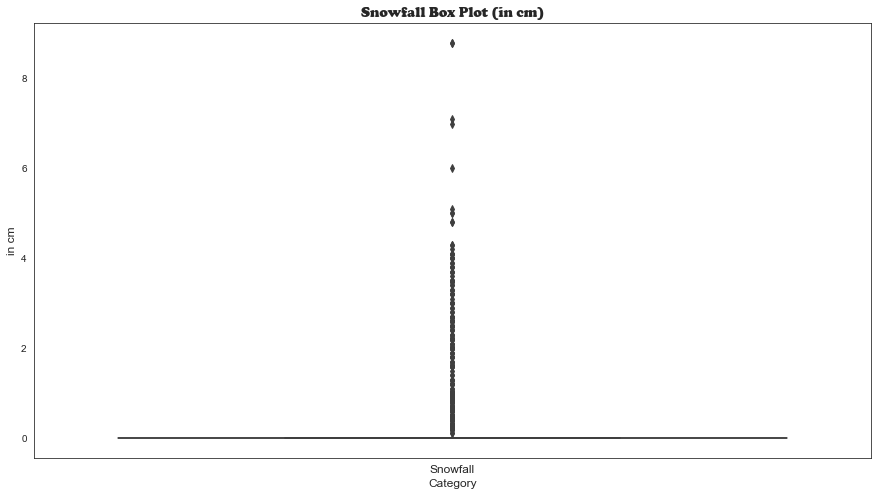

In [92]:
fig,ax=plt.subplots(figsize=(15,8))

sns.boxplot(data=df_seoulbike_treated['snowfall_(cm)'])
ax.set_title('Snowfall Box Plot (in cm)',fontsize=14, fontname = 'Cooper Black')
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('in cm', fontsize=12)
ax.set_xticklabels(["Snowfall"], fontsize=12)


plt.savefig("../documents/charts/Snowfall Box Plot.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)

plt.show()

## 6.4 Binning the Snow Category

### 6.4.1 Creating a new Dataframe with the Snow Category feature 

In [146]:
#https://www.theweathernetwork.com/en/news/science/explainers/how-is-snowfall-measured-a-meteorologist-explains
#No snow: from 0 to 0.1 
#Light snow: from 0.1 to 5 cm.
#Moderate snow: between 5 cm and 15 cm.
#Heavy snow: above 15 cm



# Defining the bins and labels for binning tecnic
bins_snowfall = [-1.0,0.1, 5, 15, float('inf')] 
labels_snowfall = ['1_no snow','2_light snow', '3_moderate snow', '4_heavy snow']

# Crie uma nova coluna 'wind_category' com base na coluna 'wind_speed'
df_seoulbike_treated['snow_category'] = pd.cut(df_seoulbike_treated['snowfall_(cm)'], bins=bins_snowfall, labels=labels_snowfall,include_lowest=True)

# Exiba o dataframe resultante
checking_snowfall = ['snowfall_(cm)','snow_category']
df_seoulbike_treated[checking_snowfall]


,snowfall_(cm),snow_category
0,0.0,1_no snow
1,0.0,1_no snow
2,0.0,1_no snow
3,0.0,1_no snow
4,0.0,1_no snow
...,...,...
8755,0.0,1_no snow
8756,0.0,1_no snow
8757,0.0,1_no snow
8758,0.0,1_no snow


#### 6.4.1.1 Checking the unique values of the Snow Category 

In [147]:
no_snow = df_seoulbike_treated[(df_seoulbike_treated['snowfall_(cm)'] < 0.1)]
light_snow = df_seoulbike_treated[(df_seoulbike_treated['snowfall_(cm)'] < 0.1) & (df_seoulbike_treated['snowfall_(cm)'] < 5)]
moderate_snow = df_seoulbike_treated[(df_seoulbike_treated['snowfall_(cm)'] > 5) & (df_seoulbike_treated['snowfall_(cm)']<= 15)]
heavy_snow = df_seoulbike_treated[(df_seoulbike_treated['snowfall_(cm)'] >= 15)]

In [148]:
light_snow['snow_category'].unique()

['1_no snow']
Categories (1, object): ['1_no snow']

In [149]:
moderate_snow['snow_category'].unique()

['3_moderate snow']
Categories (1, object): ['3_moderate snow']

In [150]:
heavy_snow['snow_category'].unique()

[], Categories (0, object): []

In [151]:
df_seoulbike_treated['snow_category'].value_counts()

1_no snow          8317
2_light snow        437
3_moderate snow       6
4_heavy snow          0
Name: snow_category, dtype: int64

In [152]:
df_seoulbike_treated['snow_category'].value_counts(normalize='True')

1_no snow          0.949429
2_light snow       0.049886
3_moderate snow    0.000685
4_heavy snow       0.000000
Name: snow_category, dtype: float64

## 6.5 Checking all columns and dropping the ones that we had binned

In [153]:
#Checking all columns 

df_seoulbike_treated.columns

Index(['rented_bike_count', 'hour', 'temperature(°c)', 'humidity(%)',
       'wind_speed_(m/s)', 'visibility_(10m)', 'dew_point_temperature(°c)',
       'solar_radiation_(mj/m2)', 'rainfall(mm)', 'snowfall_(cm)', 'seasons',
       'holiday', 'functioning_day', 'day_of_week', 'year', 'month',
       'month_name', 'wind_category', 'solar_radiation_category',
       'visibility_category', 'rainfall_category', 'snow_category'],
      dtype='object')

In [154]:
#Let's drop 'wind_speed_(m/s)', 'visibility_(10m)','solar_radiation_(mj/m2)','rainfall(mm)','snowfall_(cm)'


In [155]:
df_seoulbike_treated=df_seoulbike_treated.drop(columns=['wind_speed_(m/s)', 'visibility_(10m)','solar_radiation_(mj/m2)','rainfall(mm)','snowfall_(cm)'])

In [156]:
# for our model we also do not need the "month_name", once we already have the "month" column and the "year" colum is not necessary once we preview the new value the new will be in the future and not in the past

df_seoulbike_treated=df_seoulbike_treated.drop(columns=['month_name', 'year'])

## 6.6 Looking for NAN values

<AxesSubplot:>

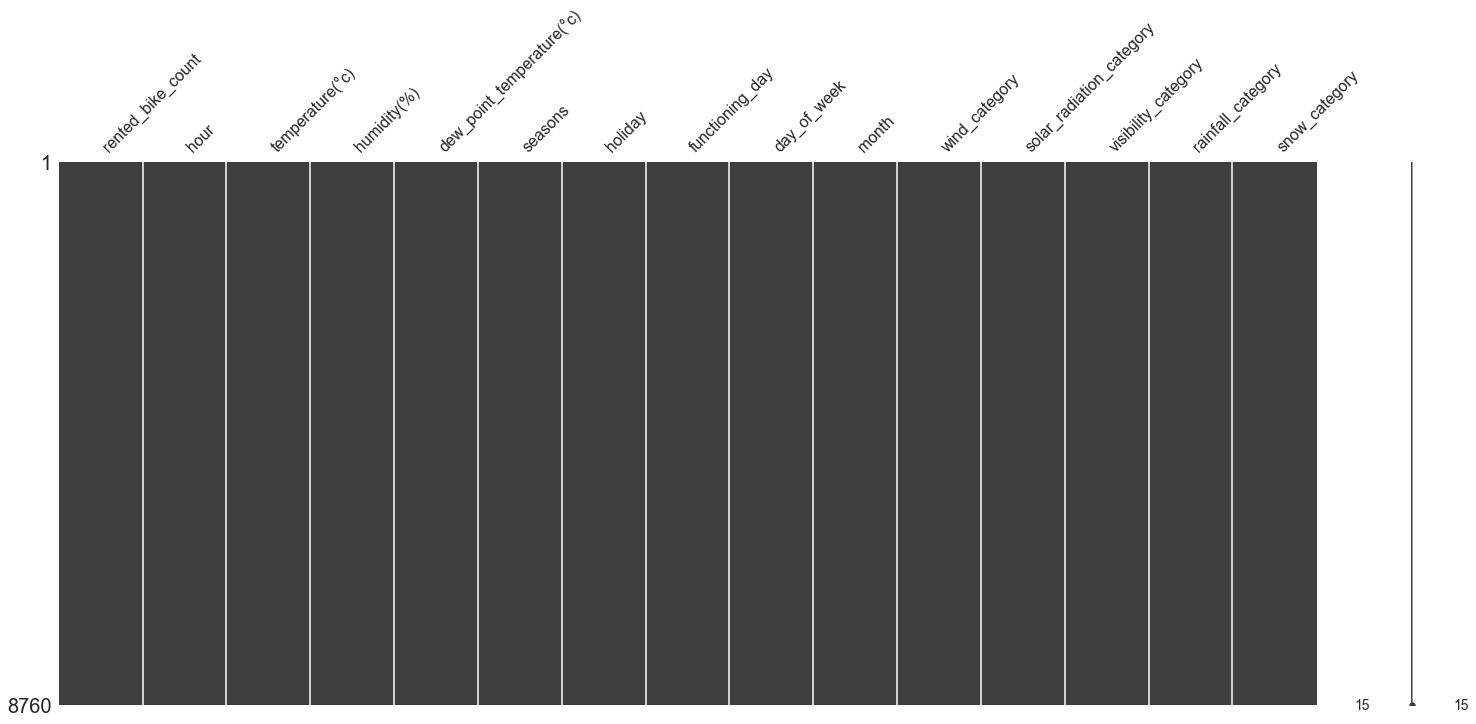

In [157]:
#Looking for NAN values
msno.matrix(df_seoulbike_treated)

In [158]:
df_seoulbike_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   rented_bike_count          8760 non-null   int64   
 1   hour                       8760 non-null   category
 2   temperature(°c)            8760 non-null   float16 
 3   humidity(%)                8760 non-null   int64   
 4   dew_point_temperature(°c)  8760 non-null   float16 
 5   seasons                    8760 non-null   category
 6   holiday                    8760 non-null   category
 7   functioning_day            8760 non-null   category
 8   day_of_week                8760 non-null   category
 9   month                      8760 non-null   category
 10  wind_category              8760 non-null   category
 11  solar_radiation_category   8760 non-null   category
 12  visibility_category        8760 non-null   category
 13  rainfall_category          8760 n

## 6.7 Redefining the columns' order

In [159]:
new_order =['month','day_of_week','functioning_day','holiday','hour','seasons','temperature(°c)','dew_point_temperature(°c)','humidity(%)','rainfall_category','snow_category','wind_category','solar_radiation_category','visibility_category','rented_bike_count']
df_seoulbike_treated = df_seoulbike_treated.reindex(columns = new_order) 

In [160]:
df_seoulbike_treated

,month,day_of_week,functioning_day,holiday,hour,seasons,temperature(°c),dew_point_temperature(°c),humidity(%),rainfall_category,snow_category,wind_category,solar_radiation_category,visibility_category,rented_bike_count
0,12,4,1,0,0,Winter,-5.199219,-17.593750,37,1_no rain,1_no snow,2_plowing,1_weak,3_moderate,254
1,12,4,1,0,1,Winter,-5.500000,-17.593750,38,1_no rain,1_no snow,1_calm,1_weak,3_moderate,204
2,12,4,1,0,2,Winter,-6.000000,-17.703125,39,1_no rain,1_no snow,1_calm,1_weak,3_moderate,173
3,12,4,1,0,3,Winter,-6.199219,-17.593750,40,1_no rain,1_no snow,1_calm,1_weak,3_moderate,107
4,12,4,1,0,4,Winter,-6.000000,-18.593750,36,1_no rain,1_no snow,2_plowing,1_weak,3_moderate,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,11,4,1,0,19,Autumn,4.199219,-10.296875,34,1_no rain,1_no snow,2_plowing,1_weak,3_moderate,1003
8756,11,4,1,0,20,Autumn,3.400391,-9.898438,37,1_no rain,1_no snow,2_plowing,1_weak,3_moderate,764
8757,11,4,1,0,21,Autumn,2.599609,-9.898438,39,1_no rain,1_no snow,1_calm,1_weak,3_moderate,694
8758,11,4,1,0,22,Autumn,2.099609,-9.796875,41,1_no rain,1_no snow,1_calm,1_weak,3_moderate,712


In [161]:
df_seoulbike_treated.select_dtypes(include ="category")

,month,day_of_week,functioning_day,holiday,hour,seasons,rainfall_category,snow_category,wind_category,solar_radiation_category,visibility_category
0,12,4,1,0,0,Winter,1_no rain,1_no snow,2_plowing,1_weak,3_moderate
1,12,4,1,0,1,Winter,1_no rain,1_no snow,1_calm,1_weak,3_moderate
2,12,4,1,0,2,Winter,1_no rain,1_no snow,1_calm,1_weak,3_moderate
3,12,4,1,0,3,Winter,1_no rain,1_no snow,1_calm,1_weak,3_moderate
4,12,4,1,0,4,Winter,1_no rain,1_no snow,2_plowing,1_weak,3_moderate
...,...,...,...,...,...,...,...,...,...,...,...
8755,11,4,1,0,19,Autumn,1_no rain,1_no snow,2_plowing,1_weak,3_moderate
8756,11,4,1,0,20,Autumn,1_no rain,1_no snow,2_plowing,1_weak,3_moderate
8757,11,4,1,0,21,Autumn,1_no rain,1_no snow,1_calm,1_weak,3_moderate
8758,11,4,1,0,22,Autumn,1_no rain,1_no snow,1_calm,1_weak,3_moderate


### 6.7.1 Checking the columns' categories

In [162]:
categorical_columns = df_seoulbike_treated.select_dtypes(include ="category").columns.to_list()

In [163]:
categorical_columns

['month',
 'day_of_week',
 'functioning_day',
 'holiday',
 'hour',
 'seasons',
 'rainfall_category',
 'snow_category',
 'wind_category',
 'solar_radiation_category',
 'visibility_category']

# 7 Separating the dataframe into training and test

In [164]:
#from sklearn.model_selection import train_test_split
target_y = df_seoulbike_treated["rented_bike_count"]
features_x = df_seoulbike_treated.drop("rented_bike_count",axis=1, inplace=False)
train_x,test_x, train_y,test_y = train_test_split(features_x, target_y, test_size=0.2, stratify=features_x['month'].to_numpy(), shuffle = True)

# 8 Applying the Machile Learning Models

#### The scikit-learn does not provide any support for variable selection using a forward selection approach.   We will write a custom class for that. page 108

## 8.1 Foward Selection Linear Regression

### 8.1.1 Creating Functions

###  8.1.2 CategorialVaribleEncoder Function and FowardSelectionLinearRegression Function

In [165]:
from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.sparse import csr_matrix
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


###incluir CategoricalVaribleEncoder class from page 53 of pragmatic Machine Learning
class CategoricalVaribleEncoder(BaseEstimator): #page 53
    
    def __init__(self,categorical_features):
        self.categorical_features = categorical_features
        #self.preprocessing_transformer = make_column_transformer((OneHotEncoder(handle_unknown="ignore"),
                                                                 #self.categorical_features),)##inclui averbose
        self.preprocessing_transformer = ColumnTransformer(transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'),
                                                                          self.categorical_features)],remainder='passthrough')#remain the not specified columns)    
    def fit(self, X, y=None):
        self.preprocessing_transformer.fit(X)
        return self
        
    def transform(self, X):
        preprocessed_x = self.preprocessing_transformer.transform(X)
        return csr_matrix(preprocessed_x).todense()

    def fit_transform(self, X, y=None):
        self.fit(X, y)  # Call fit to learn encoding
        return self.transform(X)  # Apply encoding to data



class FowardSelectionLinearRegression(BaseEstimator): #page 108
    
    def __init__(self):
        self.optimal_predictors = None
        self.optimal_model = None
        
    def fit(self, X,y=None):
        current_predictors = []
        if not isinstance(X,pd.DataFrame):
            X = pd.DataFrame(X)
        remaining_predictors = list(X)
        adjusted_r2_diff = 1
        last_adjusted_r2 = 0
        
        while True:
            best_predictor, adjusted_r2, r2 = self._get_next_best_predictor_(X=X, Y=y, current_predictors = current_predictors,
                                                                           remaining_predictors = remaining_predictors)
            adjusted_r2_diff = round(adjusted_r2 - last_adjusted_r2, 2)
            if adjusted_r2_diff <= 0.00 or len(remaining_predictors) <= 0:
                break
                
            current_predictors.append(best_predictor)
            remaining_predictors.remove(best_predictor)
            last_adjusted_r2 = adjusted_r2
            
        self.optimal_predictors_ = current_predictors
        self.optimal_model_ = LinearRegression().fit(X[self.optimal_predictors_],y)
        
    def _adjusted_r2_score_(self, r2_val, n, k):
        return (1-(((1-r2_val)*(n-1))/(n-k-1)))
    
    def _get_next_best_predictor_(self, X, Y, current_predictors=None, remaining_predictors=None):
        max_adjusted_r2_val = 0
        adjusted_r2_val = 0
        best_r2_val = 0
        r2Val = 0
        best_predictor = None
        n = len(X)
        
        for predictor in remaining_predictors:
            lr = LinearRegression()
            
            predictors = []
            predictors.extend(current_predictors)
            predictors.append(predictor)
            
            lr.fit(X[predictors],Y)
            predY = lr.predict(X[predictors])
            r2Val = r2_score(Y,predY)
            adjusted_r2_val = self._adjusted_r2_score_(r2Val, n,len(predictors))
            if max_adjusted_r2_val < adjusted_r2_val:
                best_predictor = predictor
                max_adjusted_r2_val = adjusted_r2_val
                best_r2_val = r2Val
                
        return best_predictor, max_adjusted_r2_val, best_r2_val
    
    def predict(self, X):
        if not isinstance(X,pd.DataFrame):
            X = pd.DataFrame(X)
        X = X[self.optimal_predictors_]
        return self.optimal_model_.predict(X)
    

In [166]:
#checking the parameters of the make_column_transformer function
import inspect
inspect.getfullargspec(make_column_transformer)

FullArgSpec(args=[], varargs='transformers', varkw=None, defaults=None, kwonlyargs=['remainder', 'sparse_threshold', 'n_jobs', 'verbose'], kwonlydefaults={'remainder': 'drop', 'sparse_threshold': 0.3, 'n_jobs': None, 'verbose': False}, annotations={})

### 8.1.3 Applying the Forward Selection Leinear Regression Model

In [167]:
fs_lr = FowardSelectionLinearRegression()

bike_seoul_pl_fs_lr = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('foward_selection_model',fs_lr)
        
    ]
)
    
bike_seoul_pl_fs_lr.fit(train_x,train_y)
        

Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['month',
                                                                 'day_of_week',
                                                                 'functioning_day',
                                                                 'holiday',
                                                                 'hour',
                                                                 'seasons',
                                                                 'rainfall_category',
                                                                 'snow_category',
                                                                 'wind_category',
                                                                 'solar_radiation_category',
                                                                 'visibility_category'])),
                ('scaler', StandardScaler()),
                ('fow

In [168]:
inspect.getfullargspec(bike_seoul_pl_fs_lr.fit)

FullArgSpec(args=['self', 'X', 'y'], varargs=None, varkw='fit_params', defaults=(None,), kwonlyargs=[], kwonlydefaults=None, annotations={})

### 8.1.3.1 Seeing the Best Predictors

In [169]:
## page 110 to see the best predictors
list(df_seoulbike_treated.loc[fs_lr.optimal_predictors_])

['month',
 'day_of_week',
 'functioning_day',
 'holiday',
 'hour',
 'seasons',
 'temperature(°c)',
 'dew_point_temperature(°c)',
 'humidity(%)',
 'rainfall_category',
 'snow_category',
 'wind_category',
 'solar_radiation_category',
 'visibility_category',
 'rented_bike_count']

##### 8.1.3.1.1 Get the total number of best predictors

In [170]:
len(list(df_seoulbike_treated.loc[fs_lr.optimal_predictors_]))

15

##### 8.1.3.1.2 Checking the shape

In [171]:
df_seoulbike_treated.shape

(8760, 15)

In [172]:
test_bike_seoul_pl_fs_lr_y = bike_seoul_pl_fs_lr.predict(test_x)


In [173]:
type(test_y)

pandas.core.series.Series

In [174]:
type(test_bike_seoul_pl_fs_lr_y)

numpy.ndarray

In [175]:
test_bike_seoul_pl_fs_lr_y_list = list(test_bike_seoul_pl_fs_lr_y)

In [176]:
len(test_bike_seoul_pl_fs_lr_y_list)

1752

In [177]:
len(list(test_y))

1752

### 8.1.4 Getting the R2 Score

In [178]:
r2_score_fs_lr = r2_score(list(test_y), test_bike_seoul_pl_fs_lr_y_list)

In [179]:
r2_score_fs_lr

0.6870144882049509

#### 8.1.4.1 Getting the maximum and minimum value predicted

In [180]:
test_bike_seoul_pl_fs_lr_y.max(axis=0)

2285.304196669036

In [181]:
minimun_value_fs = test_bike_seoul_pl_fs_lr_y.min(axis=0)
minimun_value_fs

-1059.7909478999552

That's is not good we have negative numbers here. Can I rent negative bikes?
No!!


In [182]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
#print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(list(test_y), test_bike_seoul_pl_fs_lr_y_list))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(list(test_y), test_bike_seoul_pl_fs_lr_y_list))

Mean squared error: 131609.83
Coefficient of determination: 0.69


## 8.2 Plotting the values

### 8.2.1 A draft chart without mean

In [183]:
#muito bem, se eu apenas montar um gráfico como as horas se repentem vejam como ficaria o gráfico:

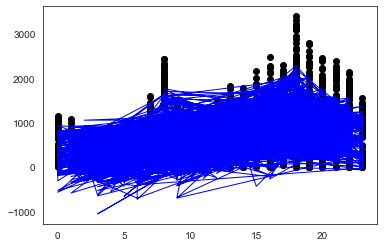

In [184]:
# Plot outputs
plt.scatter(test_x['hour'].to_numpy(), test_y, color="black")
plt.plot(test_x['hour'].to_numpy(), test_bike_seoul_pl_fs_lr_y, color="blue", linewidth=1)

#plt.xticks(())
#plt.yticks(())

plt.show()

### 8.2.2 Grouping values to create a chart


In [185]:
#Bom para isto eu terei que voltar a unir os test_x e o text_y, assim como os valores previstos:


# Criar um DataFrame com as previsões e os valores reais
results_df = pd.DataFrame({'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': test_bike_seoul_pl_fs_lr_y})

# Agrupar os dados por hora e calcular a média das quantidades de bikes alugadas reais e previstas
grouped_data = results_df.groupby('hour').agg({'real_bike_count': 'mean', 'predicted_bike_count': 'mean'}).reset_index()




In [186]:
grouped_data

,hour,real_bike_count,predicted_bike_count
0,0,470.416667,306.882702
1,1,402.226667,288.723471
2,2,305.544444,353.121710
3,3,204.613333,245.064033
4,4,136.761905,304.618332
5,5,146.906667,299.049885
6,6,280.333333,231.268130
7,7,675.968750,719.775454
8,8,1124.246753,1011.500769
9,9,671.578313,468.114600


### 8.2.3 Plotting the Foward Selection Linear Regression charts


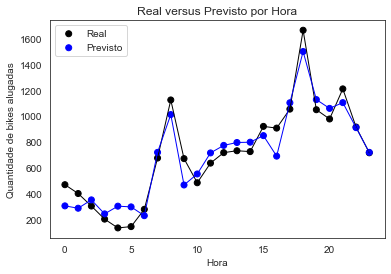

In [187]:

# Agrupar os dados por hora e calcular a média das quantidades de bikes alugadas reais e previstas

color_for_positive_real = 'black'
color_for_negative_real = 'coral'
color_for_positive_prevision = 'blue'
color_for_negative_prevision = 'red'


# Create an array of colors based on the values
colors_real = [color_for_positive_real if value >= 0 else color_for_negative_real for value in grouped_data['real_bike_count']]
color_prevision = [color_for_positive_prevision if value >= 0 else color_for_negative_prevision for value in grouped_data['predicted_bike_count']]
  

# Plotar o gráfico de dispersão com a média dos valores
plt.scatter(grouped_data['hour'], grouped_data['real_bike_count'], color=colors_real, label='Real')
plt.scatter(grouped_data['hour'], grouped_data['predicted_bike_count'], color=color_prevision, label='Previsto')

# Plotar as linhas conectando os pontos
plt.plot(grouped_data['hour'], grouped_data['real_bike_count'], color='black', linestyle='-', linewidth=1)
plt.plot(grouped_data['hour'], grouped_data['predicted_bike_count'], color='blue', linestyle='-', linewidth=1)

# Adicionar rótulos e título
plt.xlabel('Hora')
plt.ylabel('Quantidade de bikes alugadas')
plt.title('Real versus Previsto por Hora')
plt.legend()

# Mostrar o gráfico
plt.show()


#### 8.2.3.1 Plotting the Foward Selection Linear Regression charts by month

##### 8.2.3.1.1 A function to plot by month

In [191]:
def creating_charts_for_month(results_df,fig_suptitle):
    # Criar uma figura com subplots para cada mês
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))  # Assumindo 12 meses, ajuste conforme necessário

    # Iterar sobre cada mês e plotar os dados correspondentes
    for i, month in enumerate(range(1, 13)):  # Os meses estão numerados de 1 a 12
        ax = axes[i // 4, i % 4]  # Calcular a posição do subplot
        month_data = results_df[results_df['month'] == month]  # Selecionar os dados para o mês atual
        grouped_data = month_data.groupby('hour').agg({'real_bike_count': 'mean', 'predicted_bike_count': 'mean'}).reset_index()
    
        color_for_positive_real = 'black'
        color_for_negative_real = 'coral'
        color_for_positive_prevision = 'blue'
        color_for_negative_prevision = 'red'
    
        # Create an array of colors based on the values
        colors_real = [color_for_positive_real if value >= 0 else color_for_negative_real for value in grouped_data['real_bike_count']]
        color_prevision = [color_for_positive_prevision if value >= 0 else color_for_negative_prevision for value in grouped_data['predicted_bike_count']]
    
        # Plotar os dados do mês atual
        ax.scatter(grouped_data['hour'], grouped_data['real_bike_count'], color=colors_real, label='Real')
        ax.scatter(grouped_data['hour'], grouped_data['predicted_bike_count'], color=color_prevision, label='Previsto')
    
        # Plotar as linhas conectando os pontos
        ax.plot(grouped_data['hour'], grouped_data['real_bike_count'], color='black', linestyle='-', linewidth=1)
        ax.plot(grouped_data['hour'], grouped_data['predicted_bike_count'], color='blue', linestyle='-', linewidth=1)
    
        # Configurar títulos e rótulos do eixo
        month_name = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Set',10:'Oct',11:'Nov',12:'Dec'}
        ax.set_title(month_name[month])
        ax.set_xlabel('Hora')
        ax.set_ylabel('Quantidade de bikes alugadas')
        ax.legend()
        

    # Ajustar layout
    plt.tight_layout()
    
    fig.suptitle(fig_suptitle,fontsize=16, y=1.05)
    #Saving the fig doc
    plt.savefig(f"../documents/charts/{fig_suptitle}.png",transparent = False,facecolor ="w",bbox_inches ="tight",pad_inches = 1,edgecolor ='w',orientation ='landscape', dpi=300)


    # Mostrar os subplots
    plt.show()


###### 8.2.3.1.1.1 Creating a DataFrame with prediction and real values

In [189]:
#I really liked this chart, with it I can have a real idea about the prevision and the real bikes rented. But I wish see it by month. Lest see how it works


# Creating a DataFrame with prediction and real values
results_df = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': test_bike_seoul_pl_fs_lr_y})



###### 8.2.3.1.1.2 Plotting by month

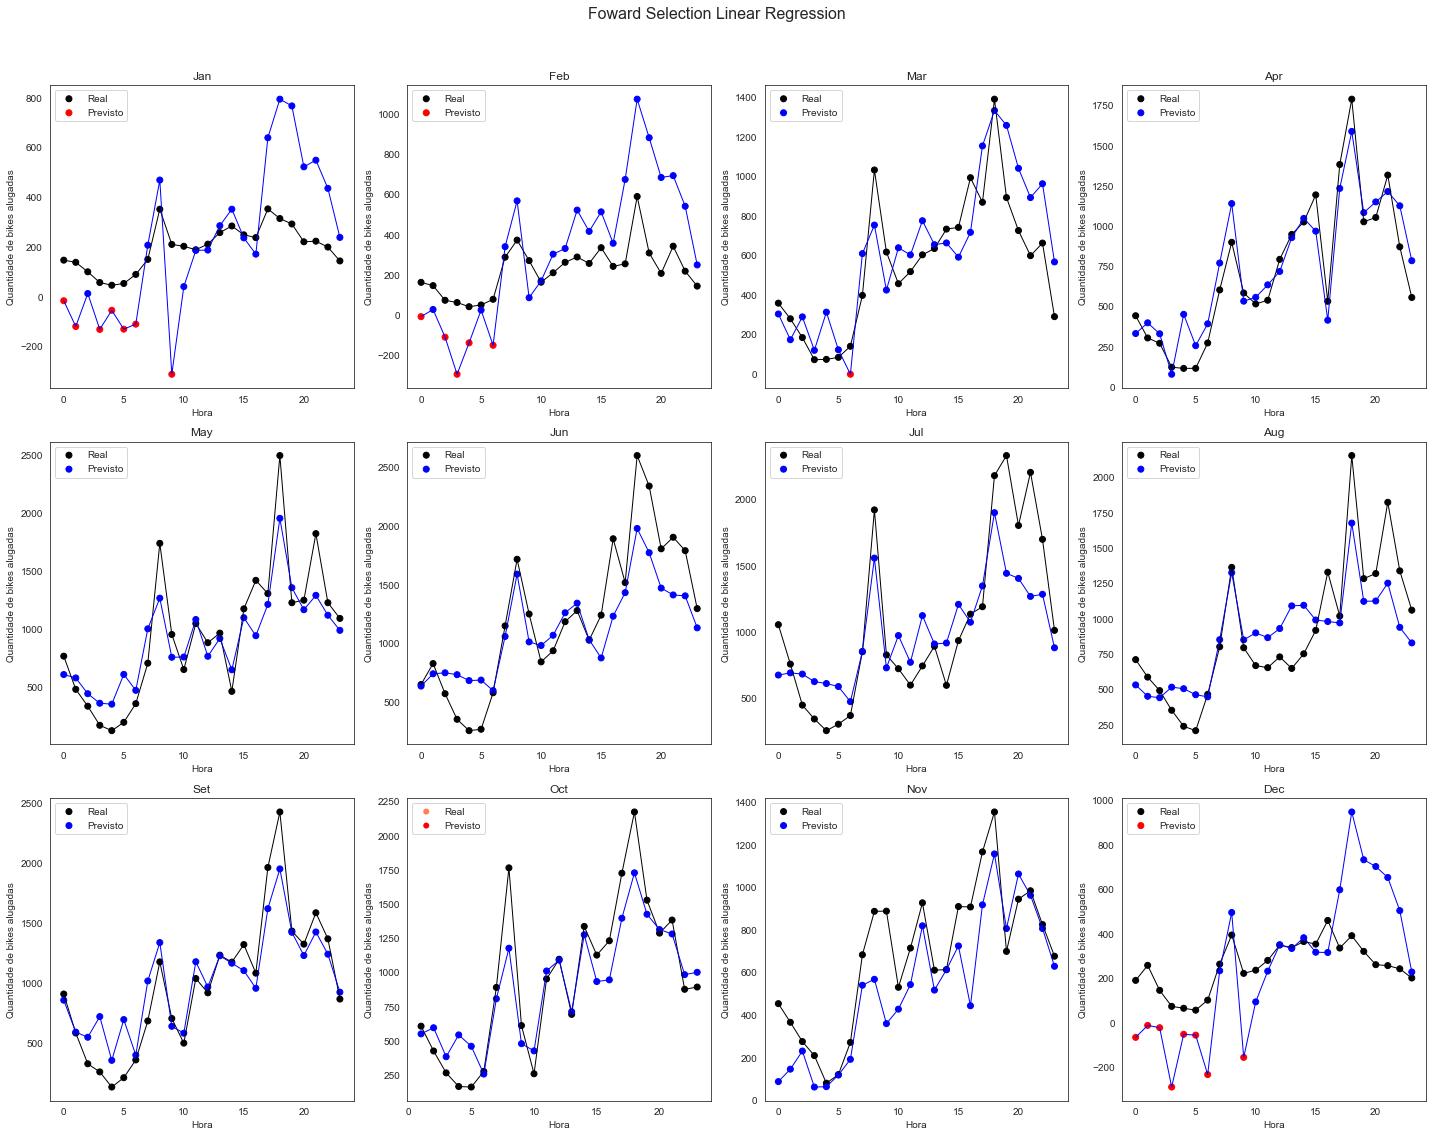

In [192]:
fig_suptitle_FS = 'Foward Selection Linear Regression'
creating_charts_for_month(results_df,fig_suptitle_FS)

TO DO: POIS É PARECE QUE ESTAMOS COM VALORES NEGATIVOS AQUI.... HUN... MAS QUE COISA... VOU TER QUE RESOLVER ISTO

In [226]:
# Ok let's fix it with the clipping tecnique. It's  post-processing tecnique.

predictions_clipped_fs_lr_y = np.clip(test_bike_seoul_pl_fs_lr_y, a_min=0, a_max=None)

In [227]:
#Let's fiz the charts witn the clipping tecnique applied



In [228]:
#I really liked this chart, with it I can have a real idea about the prevision and the real bikes rented. But I wish see it by month. Lest see how it works


# Criar um DataFrame com as previsões e os valores reais
results_df_clipped_fs_lr = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': predictions_clipped_fs_lr_y})


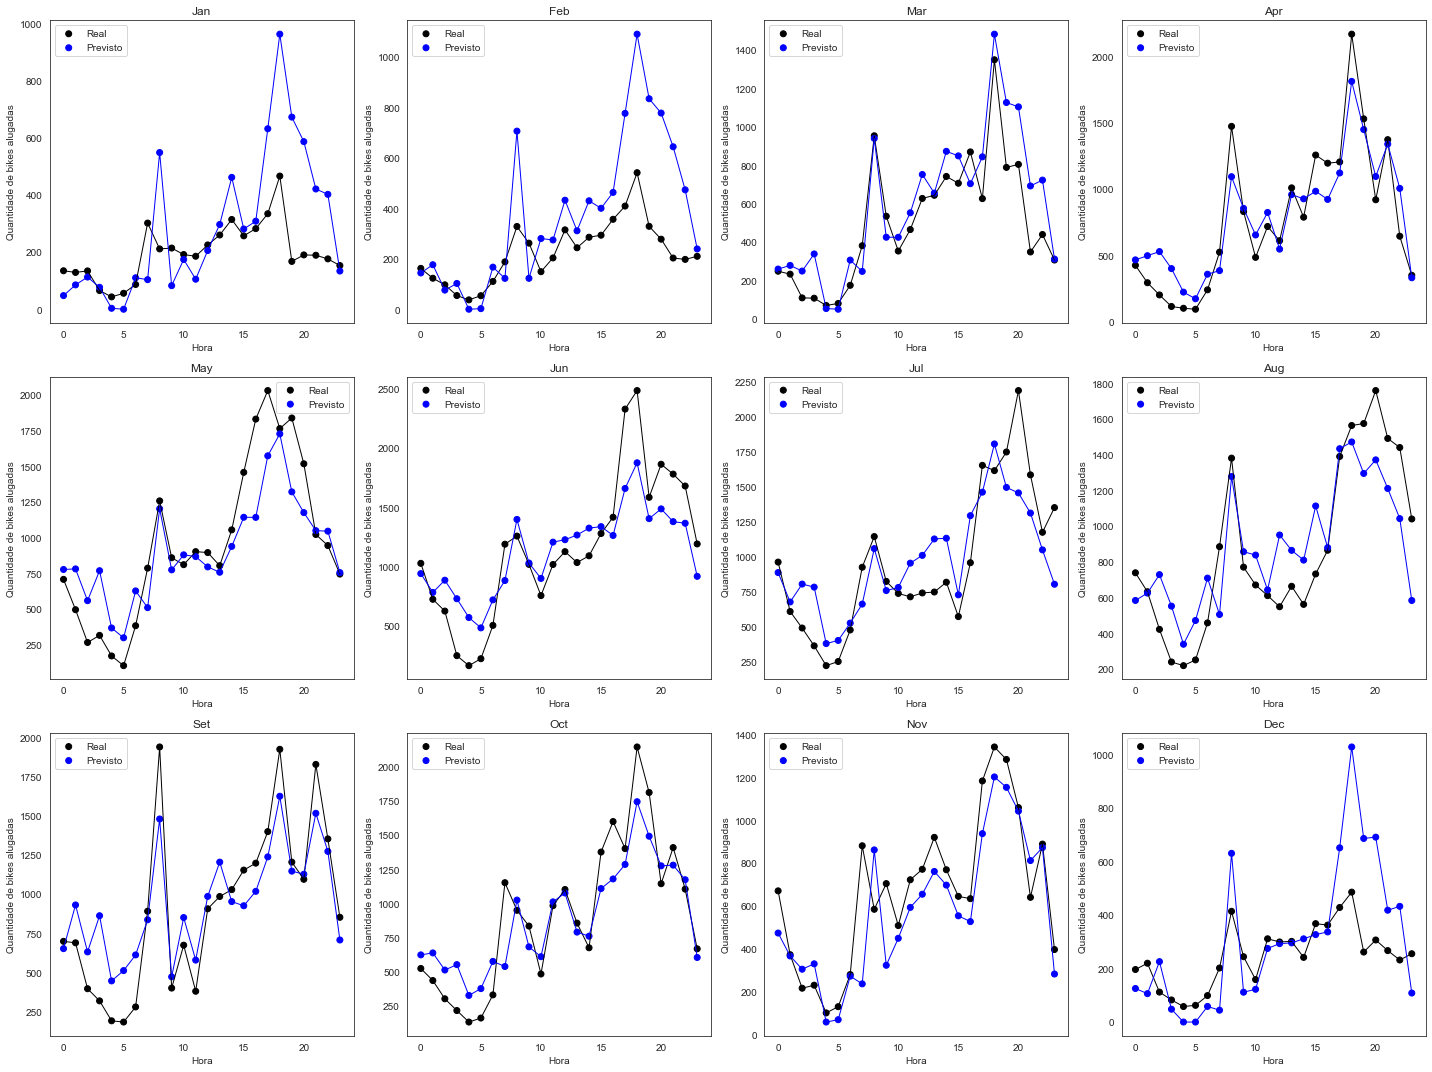

In [229]:
creating_charts_for_month(results_df_clipped_fs_lr)

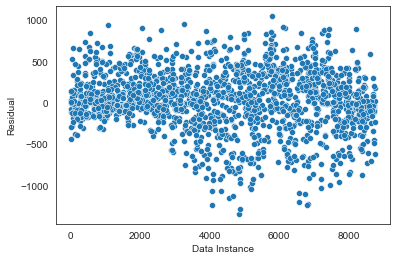

In [230]:
import seaborn as sns
residuals = predictions_clipped_fs_lr_y- test_y
sns.scatterplot(data = residuals)
plt.xlabel("Data Instance")
plt.ylabel("Residual")
plt.show()



## Polynomial Regression

In [231]:
class PolynomialRegression(BaseEstimator):
    '''
    '''
    def __init__(self, degree=2):
        self.degree = degree
        self.poly_reg_model = LinearRegression()
        
    def _generate_polynomial_features_(self, X):
        '''
        '''
        new_columns = []
        columns = list(X)
        for c in columns:
            for d in range(2, (self.degree+1)):
                new_c = str(c)+"^"+str(d)
                X[new_c]=pow(X[c],d)
        return X

    def fit(self, X, y=None):
        '''
        '''
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        X = self._generate_polynomial_features_(X)
        self.poly_reg_model.fit(X,y)
        
    def predict(self, X):
        '''
        '''
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        X = self._generate_polynomial_features_(X)
        return self.poly_reg_model.predict(X)
            

In [232]:
poly_reg = PolynomialRegression(degree=11)
poly_lr_pl = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('poly_reg',poly_reg)
        
    ]
)

poly_lr_pl.fit(train_x,train_y)

Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['month',
                                                                 'day_of_week',
                                                                 'functioning_day',
                                                                 'holiday',
                                                                 'hour',
                                                                 'seasons',
                                                                 'rainfall_category',
                                                                 'snow_category',
                                                                 'wind_category',
                                                                 'solar_radiation_category',
                                                                 'visibility_category'])),
                ('scaler', StandardScaler()),
                ('pol

In [233]:
predited_poly_y = poly_lr_pl.predict(test_x)

In [234]:
predited_poly_y

array([1253.13571686,  693.53700159, 1214.92921218, ..., 1607.58596566,
        336.78483293, -192.35660961])

In [235]:
test_y.to_numpy()

array([1839,  553, 1088, ...,  843,  356,   81], dtype=int64)

In [236]:
r2_score(test_y.to_numpy(),predited_poly_y)

0.7192560467668312

In [237]:
train_predited_poly_y = poly_lr_pl.predict(train_x)

In [238]:
rs_score_polyr = r2_score(train_y.to_numpy(),train_predited_poly_y)
rs_score_polyr

0.7100090679316966

In [239]:
minimun_value_poly = predited_poly_y.min() #novamente negative values
minimun_value_poly 

-1064.5041249370338

### Plotting the Polynomial Regression charts

In [240]:
# https://matplotlib.org/stable/gallery/color/set_alpha.html#sphx-glr-gallery-color-set-alpha-py

### Agrupando os valores para montar um gráfico com valores agrupados

In [241]:
#########################
#Bom para isto eu terei que voltar a unir os test_x e o text_y, assim como os valores previstos:


# Criar um DataFrame com as previsões e os valores reais
grouped_data_poly = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': predited_poly_y})




In [242]:
grouped_data_poly 

,month,hour,real_bike_count,predicted_bike_count
2826,3,18,1839,1253.135717
3059,4,11,553,693.537002
6900,9,12,1088,1214.929212
8328,11,0,587,692.824145
8538,11,18,1679,1514.862655
...,...,...,...,...
3187,4,19,1641,1612.322761
4007,5,23,225,774.886853
5754,7,18,843,1607.585966
877,1,13,356,336.784833


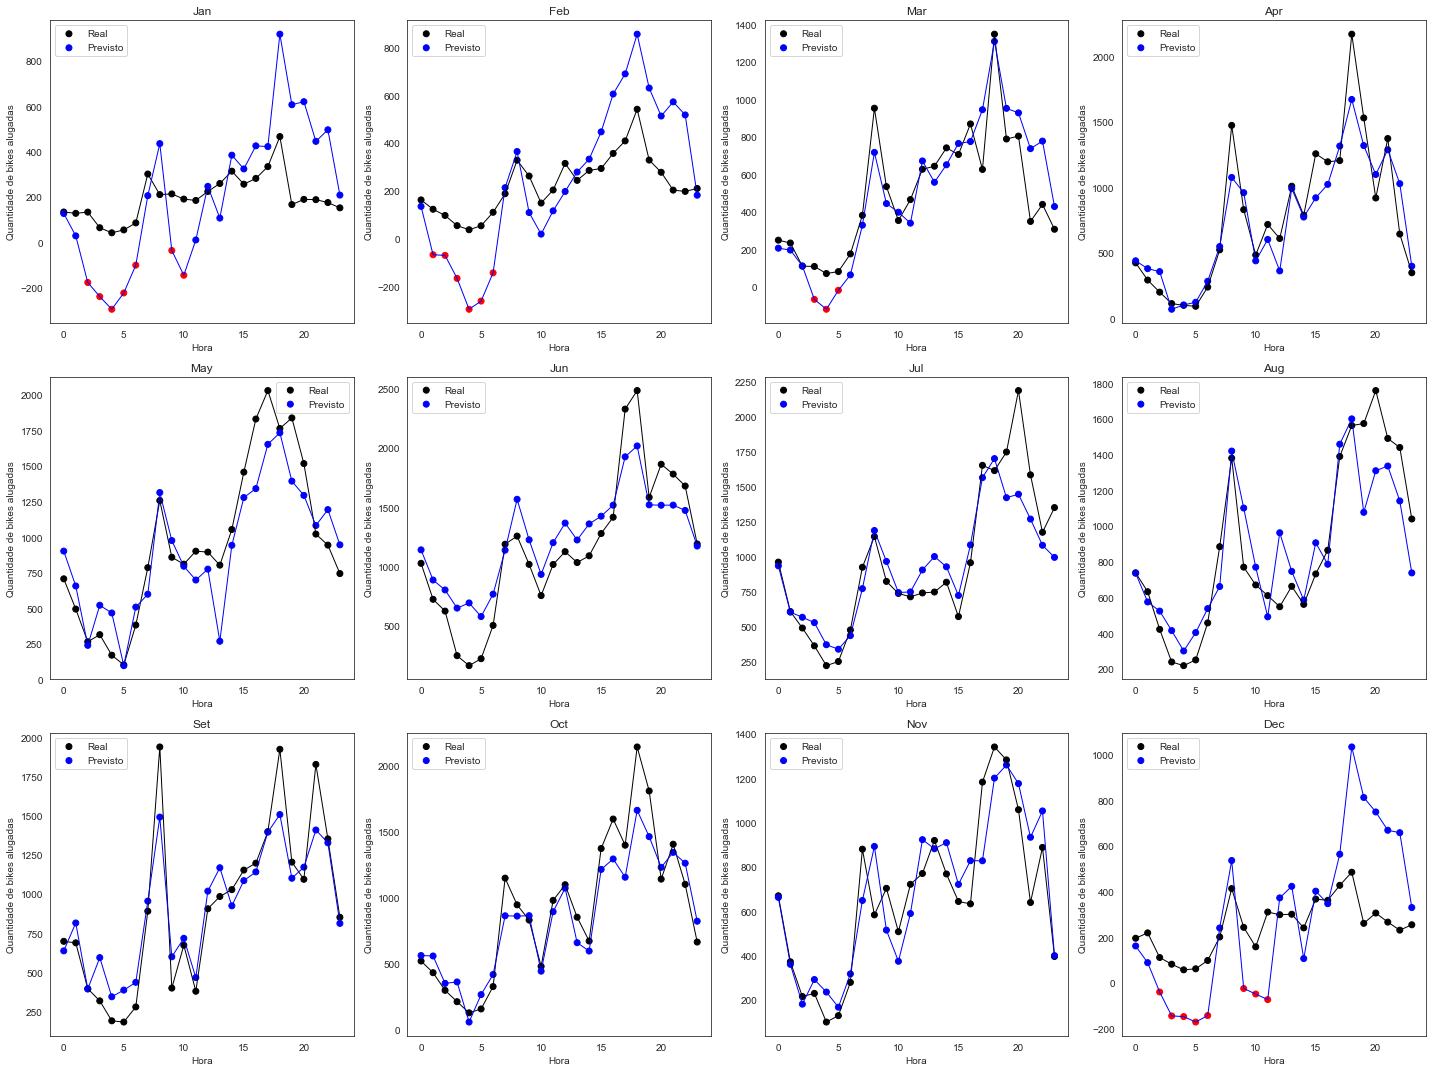

In [243]:
creating_charts_for_month(grouped_data_poly)

In [244]:
#We have a problem of overfitting here as explained in page 118

## Lasso

In [245]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_bike_model_pl = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('lr',lasso_model)
        
    ]
)
lasso_bike_model_pl.fit(train_x,train_y)


Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['month',
                                                                 'day_of_week',
                                                                 'functioning_day',
                                                                 'holiday',
                                                                 'hour',
                                                                 'seasons',
                                                                 'rainfall_category',
                                                                 'snow_category',
                                                                 'wind_category',
                                                                 'solar_radiation_category',
                                                                 'visibility_category'])),
                ('scaler', StandardScaler()), ('lr', Lasso())])

In [246]:
test_lasso_bike_y = lasso_bike_model_pl.predict(test_x)


In [247]:
test_lasso_bike_y

array([1481.1506742 ,  513.23085158, 1151.97999265, ..., 1594.74199867,
        310.77854551, -166.62565811])

In [248]:
rs_score_lasso = r2_score(test_y.to_numpy(),test_lasso_bike_y)
rs_score_lasso

0.729644824988533

In [249]:
minimun_value_lasso = test_lasso_bike_y.min()
minimun_value_lasso

-930.0384058873009

In [250]:
#########################
#Bom para isto eu terei que voltar a unir os test_x e o text_y, assim como os valores previstos:


# Criar um DataFrame com as previsões e os valores reais
grouped_data_lasso = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': test_lasso_bike_y})



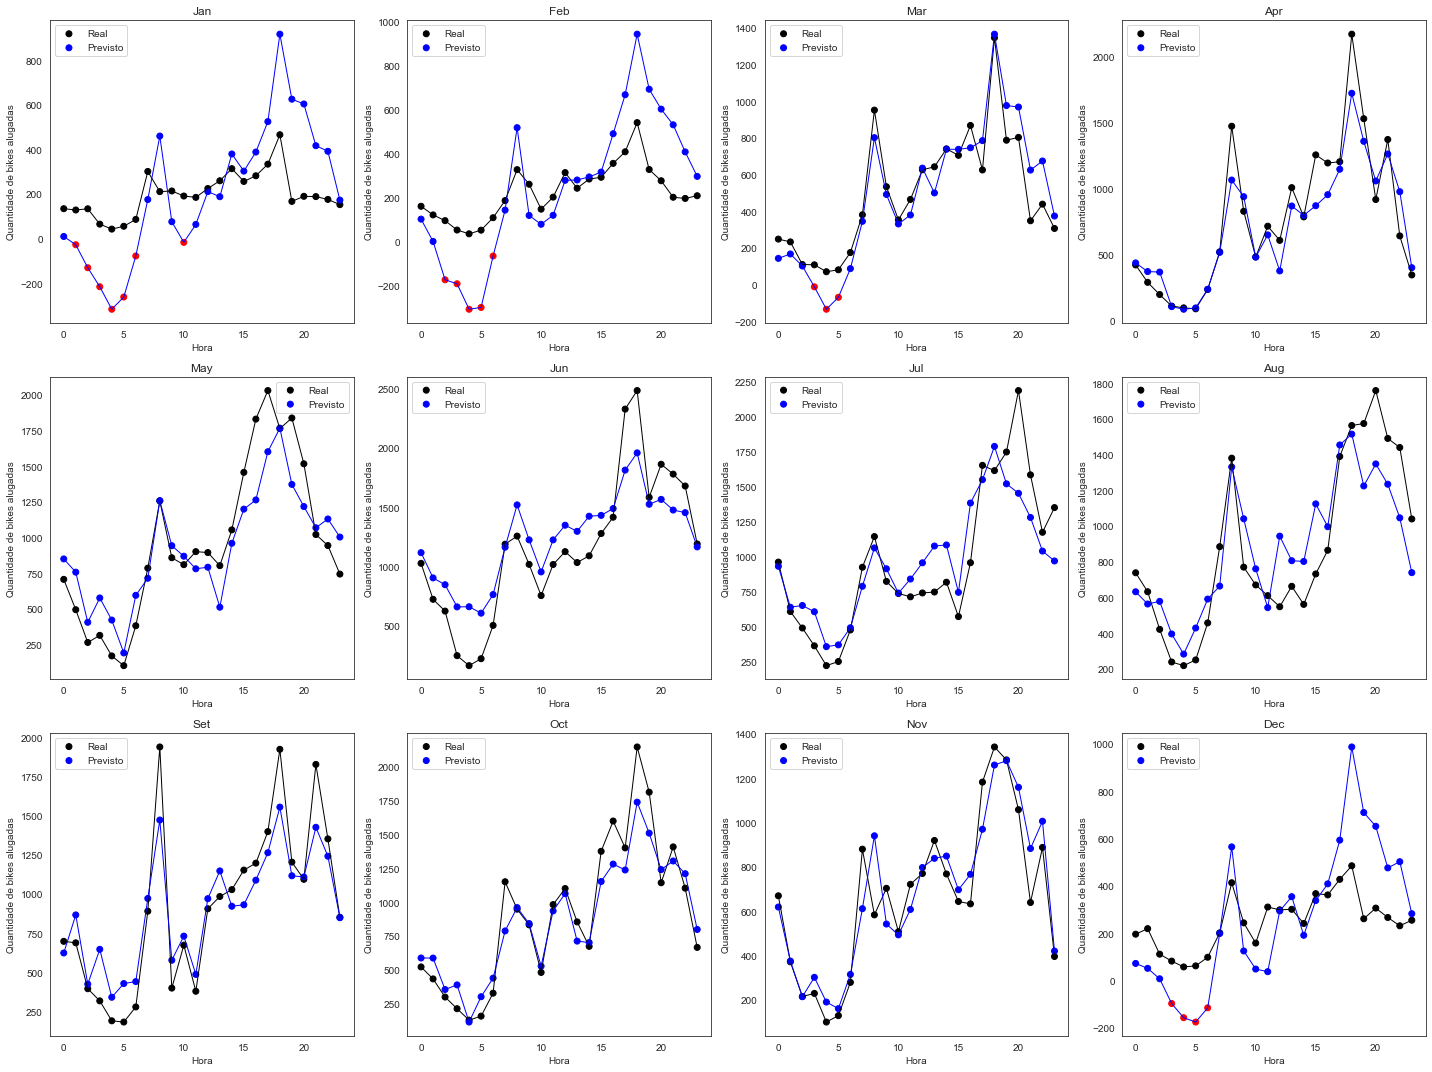

In [251]:
creating_charts_for_month(grouped_data_lasso)

In [252]:
#the clipping tecnique
predictions_clipped_lasso_bike_y = np.clip(test_lasso_bike_y, a_min=0, a_max=None)


## DecisionTreeRegressor

In [253]:
from sklearn.tree import DecisionTreeRegressor

dt_bike_reg = DecisionTreeRegressor()
dt_bike_reg_pl = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('dt_reg',dt_bike_reg)
        
    ]
)

dt_bike_reg_pl.fit(train_x,train_y)

Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['month',
                                                                 'day_of_week',
                                                                 'functioning_day',
                                                                 'holiday',
                                                                 'hour',
                                                                 'seasons',
                                                                 'rainfall_category',
                                                                 'snow_category',
                                                                 'wind_category',
                                                                 'solar_radiation_category',
                                                                 'visibility_category'])),
                ('scaler', StandardScaler()),
                ('dt_

In [254]:
predicted_bike_dt_reg_y = dt_bike_reg_pl.predict(test_x)
r2_score_dtr = r2_score(test_y,predicted_bike_dt_reg_y)
r2_score_dtr 

0.856636577100458

In [255]:
#TO DO ver se o bonitão está prevendo números negativos

In [256]:
minimun_value_dtr = predicted_bike_dt_reg_y.min()
minimun_value_dtr

0.0

In [257]:
#I really liked this chart, with it I can have a real idea about the prevision and the real bikes rented. But I wish see it by month. Lest see how it works


# Criar um DataFrame com as previsões e os valores reais
results_df_dtr = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': predicted_bike_dt_reg_y})



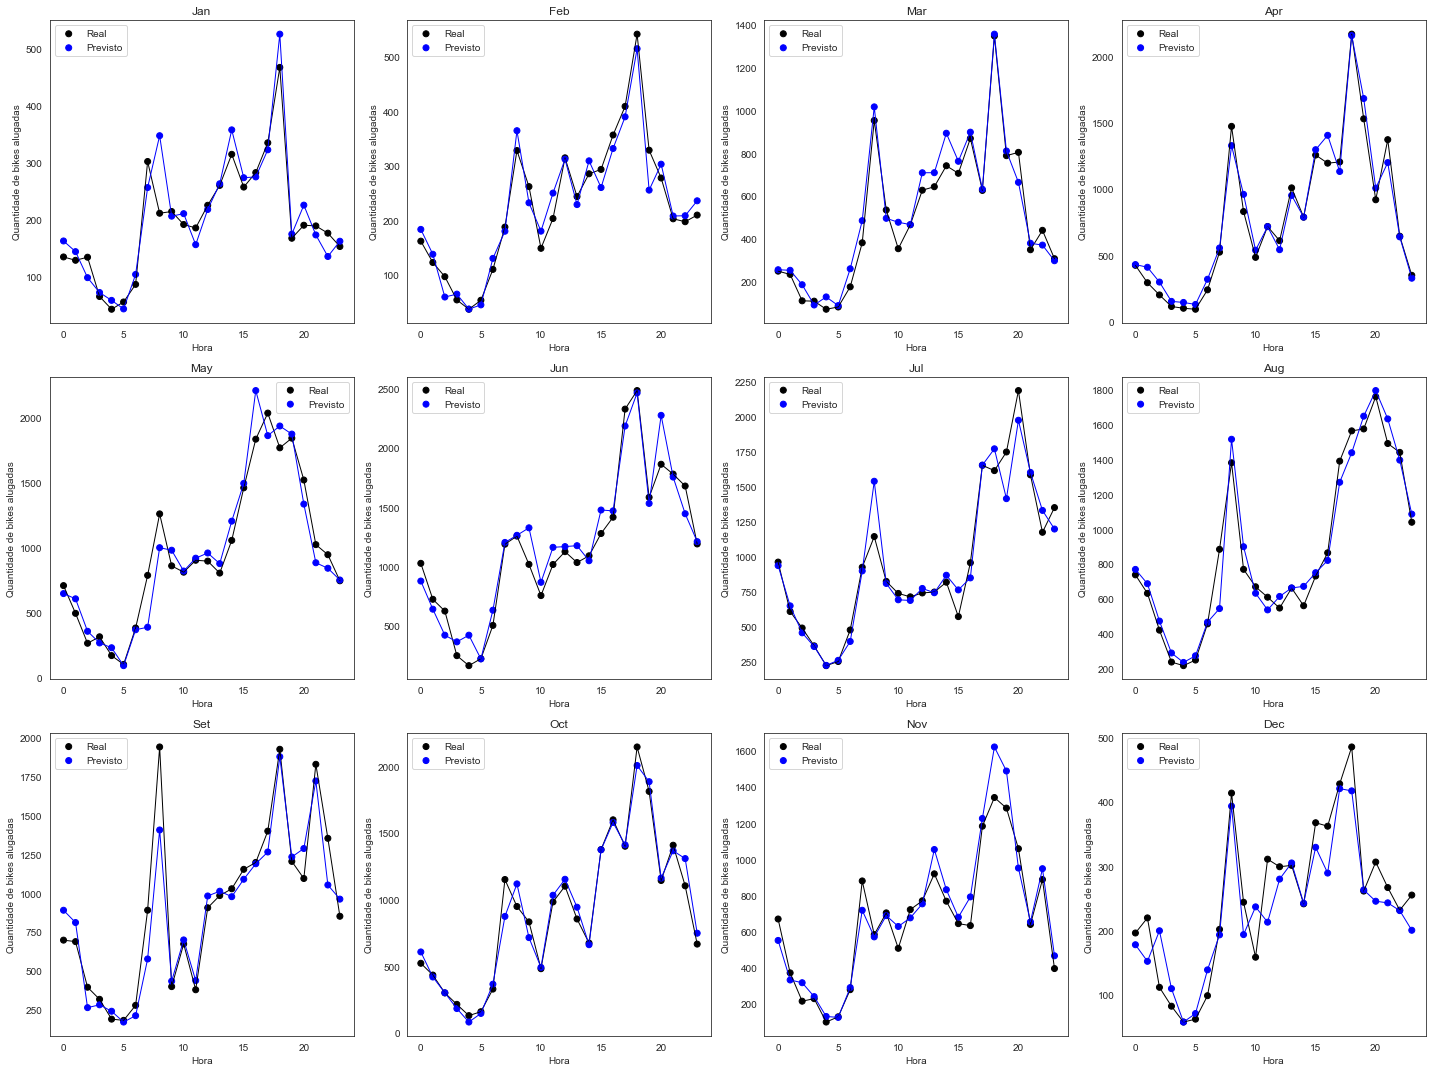

In [258]:
creating_charts_for_month(results_df_dtr)

## SVM

In [259]:


from sklearn.svm import LinearSVR

bike_svm_reg = LinearSVR(1.5)
bike_svm_reg_pl = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('SVM_reg',bike_svm_reg)
        
    ]
)

bike_svm_reg_pl.fit(train_x,train_y)

C:\Users\recal\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass epsilon=1.5 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['month',
                                                                 'day_of_week',
                                                                 'functioning_day',
                                                                 'holiday',
                                                                 'hour',
                                                                 'seasons',
                                                                 'rainfall_category',
                                                                 'snow_category',
                                                                 'wind_category',
                                                                 'solar_radiation_category',
                                                                 'visibility_category'])),
                ('scaler', StandardScaler()),
                ('SVM

In [260]:
predicted_bike_dt_svm_y =bike_svm_reg_pl.predict(test_x)
rs_score_svm_lsvr = r2_score(test_y.to_numpy(),predicted_bike_dt_svm_y)
rs_score_svm_lsvr

0.6875829367430011

In [261]:
test_y

2826    1839
3059     553
6900    1088
8328     587
8538    1679
        ... 
3187    1641
4007     225
5754     843
877      356
1107      81
Name: rented_bike_count, Length: 1752, dtype: int64

In [262]:
predicted_bike_dt_svm_y

array([1199.01004498,  596.49543734, 1096.45078612, ..., 1345.64295727,
        335.25629656, -203.06482243])

In [263]:
minimun_value_svm_lsvr = predicted_bike_dt_svm_y.min()
minimun_value_svm_lsvr

-976.4153142813826

In [264]:
#I really liked this chart, with it I can have a real idea about the prevision and the real bikes rented. But I wish see it by month. Lest see how it works


# Criar um DataFrame com as previsões e os valores reais
results_df_svm = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': predicted_bike_dt_svm_y})



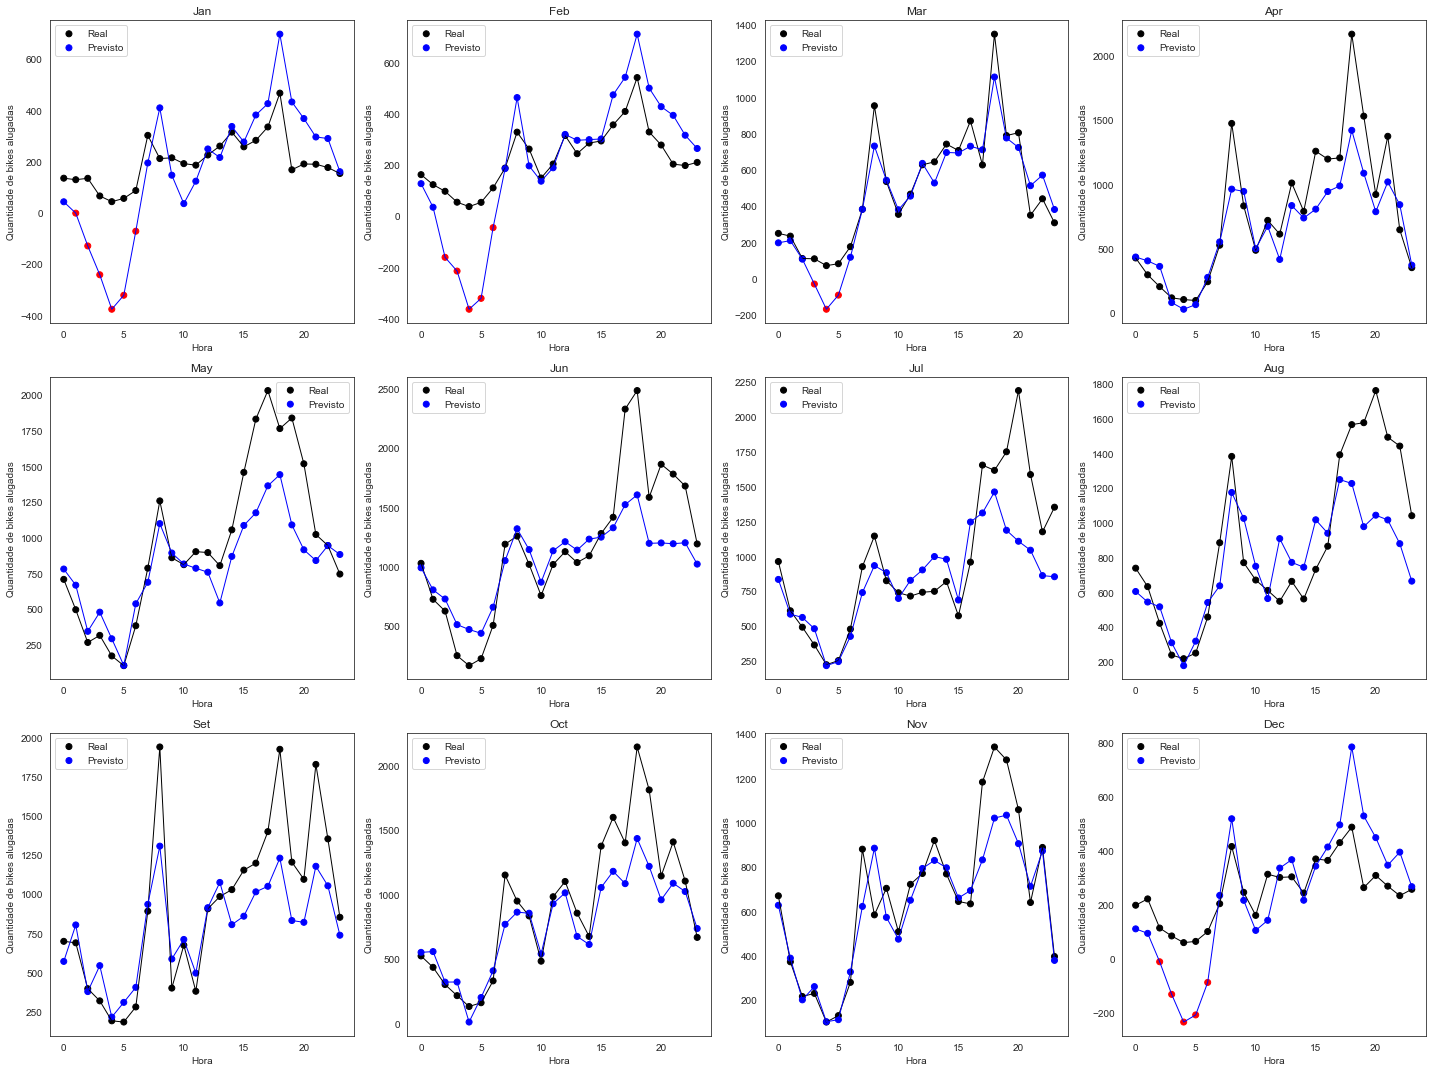

In [265]:
creating_charts_for_month(results_df_svm)

## SVR

In [266]:
from sklearn.svm import SVR

bike_svm_reg_2 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
bike_svm_reg_pl_2 = Pipeline(steps = [('one_hot_encoder', CategoricalVaribleEncoder(categorical_features = categorical_columns)),
        ('scaler',StandardScaler()),
        ('SVM_reg_2',bike_svm_reg_2)
        
    ]
)

bike_svm_reg_pl_2.fit(train_x,train_y)

Pipeline(steps=[('one_hot_encoder',
                 CategoricalVaribleEncoder(categorical_features=['month',
                                                                 'day_of_week',
                                                                 'functioning_day',
                                                                 'holiday',
                                                                 'hour',
                                                                 'seasons',
                                                                 'rainfall_category',
                                                                 'snow_category',
                                                                 'wind_category',
                                                                 'solar_radiation_category',
                                                                 'visibility_category'])),
                ('scaler', StandardScaler()),
                ('SVM

In [267]:
bike_svm_reg_pl_2.named_steps['one_hot_encoder'].preprocessing_transformer.get_feature_names()

['onehot__x0_1',
 'onehot__x0_2',
 'onehot__x0_3',
 'onehot__x0_4',
 'onehot__x0_5',
 'onehot__x0_6',
 'onehot__x0_7',
 'onehot__x0_8',
 'onehot__x0_9',
 'onehot__x0_10',
 'onehot__x0_11',
 'onehot__x0_12',
 'onehot__x1_0',
 'onehot__x1_1',
 'onehot__x1_2',
 'onehot__x1_3',
 'onehot__x1_4',
 'onehot__x1_5',
 'onehot__x1_6',
 'onehot__x2_0',
 'onehot__x2_1',
 'onehot__x3_0',
 'onehot__x3_1',
 'onehot__x4_0',
 'onehot__x4_1',
 'onehot__x4_2',
 'onehot__x4_3',
 'onehot__x4_4',
 'onehot__x4_5',
 'onehot__x4_6',
 'onehot__x4_7',
 'onehot__x4_8',
 'onehot__x4_9',
 'onehot__x4_10',
 'onehot__x4_11',
 'onehot__x4_12',
 'onehot__x4_13',
 'onehot__x4_14',
 'onehot__x4_15',
 'onehot__x4_16',
 'onehot__x4_17',
 'onehot__x4_18',
 'onehot__x4_19',
 'onehot__x4_20',
 'onehot__x4_21',
 'onehot__x4_22',
 'onehot__x4_23',
 'onehot__x5_Autumn',
 'onehot__x5_Spring',
 'onehot__x5_Summer',
 'onehot__x5_Winter',
 'onehot__x6_1_no rain',
 'onehot__x6_2_drizzle',
 'onehot__x6_3_light rain',
 'onehot__x6_4_mod

In [268]:
predicted_bike_dt_svm_y_2 =bike_svm_reg_pl_2.predict(test_x)
rs_score_svm_svr = r2_score(test_y.to_numpy(),predicted_bike_dt_svm_y_2)
rs_score_svm_svr

0.8563912229413281

In [269]:
minimun_values_svm_svr = predicted_bike_dt_svm_y_2.min()
minimun_values_svm_svr

-564.712059526591

In [270]:

# Criar um DataFrame com as previsões e os valores reais
results_df_svr = pd.DataFrame({'month': test_x['month'],
                           'hour': test_x['hour'],
                           'real_bike_count': test_y,
                           'predicted_bike_count': predicted_bike_dt_svm_y_2})



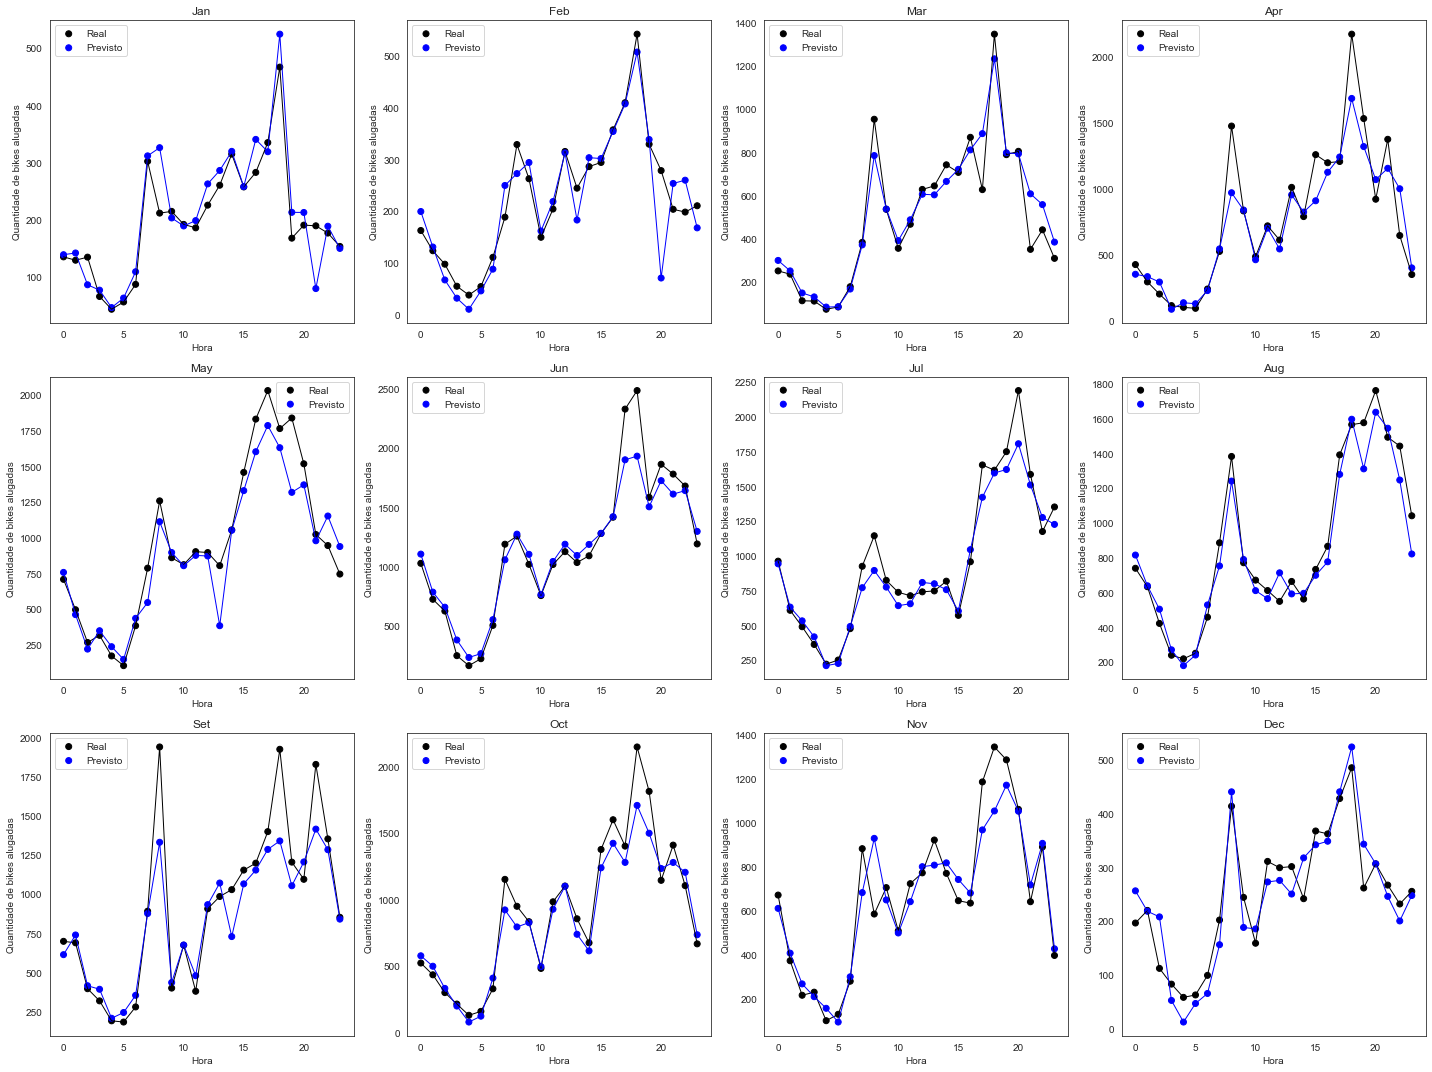

In [271]:
creating_charts_for_month(results_df_svr)

In [272]:
models_results = pd.DataFrame({'Model_Name': ['Foward Selection Linear Regression',
                                            'Polynomial Regression',
                                            'Lasso',
                                            'Decision Tree Regressor',
                                            'SVM LinearSVR',
                                            'SVM SVR'],
                             'R2 Score':[r2_score_fs_lr,
                                        rs_score_polyr,
                                        rs_score_lasso,
                                        r2_score_dtr,
                                        rs_score_svm_lsvr,
                                        rs_score_svm_svr],
                             'Minimun Value':[minimun_value_fs,
                                             minimun_value_poly,
                                             minimun_value_lasso,
                                             minimun_value_dtr,
                                             minimun_value_svm_lsvr,
                                             minimun_values_svm_svr]}
                             )
models_results = models_results.sort_values(by='R2 Score', ascending=False)
models_results

,Model_Name,R2 Score,Minimun Value
3,Decision Tree Regressor,0.856637,0.000000
5,SVM SVR,0.856391,-564.712060
2,Lasso,0.729645,-930.038406
1,Polynomial Regression,0.710009,-1064.504125
4,SVM LinearSVR,0.687583,-976.415314
0,Foward Selection Linear Regression,0.672709,-883.639375


In [273]:
model_first = bike_svm_reg_pl_2

#predicted_bike_dt_svm_y_2
#bike_svm_reg_pl_2

In [274]:
# Saving the model
joblib.dump(model_first, '../modelo/model_first.pkl')

['../modelo/model_first.pkl']

In [276]:
model = joblib.load('../modelo/model_first.pkl')

In [277]:
type(model)

sklearn.pipeline.Pipeline

In [278]:
quantity_bikes_to_predict = np.array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  0.,  0., 20.,  6., 11.])

In [279]:
bikes_to_predict ={'month':[12],'day_of_week' : [4],'functioning_day':[1],
                   'holiday':[0],'hour' :[9],'seasons': ['Summer'],
                   'temperature(°c)':[20],
                   'dew_point_temperature(°c)':[6],
                   'humidity(%)':[11],
                   'rainfall_category' : ['1_no rain'],
                   'snow_category' : ['1_no snow'],
                   'wind_category' : ['1_calm'],
                   'solar_radiation_category' : ['1_weak'],
                   'visibility_category' : ['3_moderate']
                  }



                                                                 

In [280]:
test_x.columns

Index(['month', 'day_of_week', 'functioning_day', 'holiday', 'hour', 'seasons',
       'temperature(°c)', 'dew_point_temperature(°c)', 'humidity(%)',
       'rainfall_category', 'snow_category', 'wind_category',
       'solar_radiation_category', 'visibility_category'],
      dtype='object')

In [281]:
quantity_bikes_to_predict = pd.DataFrame(data = bikes_to_predict)

In [282]:
predicted_bikes_quantities = model.predict(quantity_bikes_to_predict)
#model.predict(quantity_bikes_to_predict.reshape(1, -1))

In [283]:
predicted_bikes_quantities = np.ceil(predicted_bikes_quantities).astype(int)

In [284]:
#ok but in our test we can not have a float number
print(predicted_bikes_quantities)

[624]


In [285]:
#If our result get negative we will use the clipping tecnique. A post-processing tecnique.

predicted_bikes_quantities = np.clip(predicted_bikes_quantities, a_min=0, a_max=None)

In [286]:
print(predicted_bikes_quantities[0])

624


In [287]:
print(train_x.shape)

(7008, 14)


In [288]:
train_x.head(5)

,month,day_of_week,functioning_day,holiday,hour,seasons,temperature(°c),dew_point_temperature(°c),humidity(%),rainfall_category,snow_category,wind_category,solar_radiation_category,visibility_category
8712,11,3,1,0,0,Autumn,2.199219,-13.601562,30,1_no rain,1_no snow,1_calm,1_weak,3_moderate
4379,6,4,1,0,11,Summer,26.796875,11.203125,38,1_no rain,1_no snow,2_plowing,3_strong,3_moderate
115,12,1,1,0,19,Winter,-3.199219,-13.500000,45,1_no rain,1_no snow,1_calm,1_weak,3_moderate
1206,1,5,1,0,6,Winter,-0.099976,-6.898438,60,1_no rain,1_no snow,1_calm,1_weak,3_moderate
2978,4,2,1,0,2,Spring,14.500000,14.000000,97,3_light rain,1_no snow,2_plowing,1_weak,1_very bad


### New Pepilene with Categorical Varible Encoder separeted

In [289]:
#Refactoring the pepiline with CategoricalVaribleEncoder separeted

encoder =  CategoricalVaribleEncoder(categorical_columns)
#encoded_datax = encoder.fit(train_x)
#enconded_data_transformed = encoder.transform(encoded_datax)


bike_svm_reg_3 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
bike_svm_reg_pl_3 = Pipeline(steps=[
    ('encoder', encoder),  # Add the encoder to the pipeline
    ('scaler', StandardScaler()),
    ('SVM_reg_2', bike_svm_reg_3)
])

bike_svm_reg_pl_3.fit(train_x,train_y)

Pipeline(steps=[('encoder',
                 CategoricalVaribleEncoder(categorical_features=['month',
                                                                 'day_of_week',
                                                                 'functioning_day',
                                                                 'holiday',
                                                                 'hour',
                                                                 'seasons',
                                                                 'rainfall_category',
                                                                 'snow_category',
                                                                 'wind_category',
                                                                 'solar_radiation_category',
                                                                 'visibility_category'])),
                ('scaler', StandardScaler()),
                ('SVM_reg_2',

In [290]:
predicted_bike_dt_svm_y_3 =bike_svm_reg_pl_3.predict(test_x)
rs_score_svm_svr3 = r2_score(test_y.to_numpy(),predicted_bike_dt_svm_y_3)
rs_score_svm_svr3

0.8563912229413281

In [291]:
# Create the encoder instance
encoder = CategoricalVaribleEncoder(categorical_columns)

# Apply the encoder to train_x
encoded_train_x = encoder.fit_transform(train_x)

# Define the SVR model
bike_svm_reg_3 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)

# Create the pipeline for scaling and SVM
bike_svm_reg_pl_3 = Pipeline([
    ('scaler', StandardScaler()),
    ('SVM_reg_2', bike_svm_reg_3)
])

# Fit the pipeline with the encoded data
bike_svm_reg_pl_3.fit(encoded_train_x, train_y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVM_reg_2', SVR(C=100, degree=2, kernel='poly'))])

In [292]:
categorical_columns

['month',
 'day_of_week',
 'functioning_day',
 'holiday',
 'hour',
 'seasons',
 'rainfall_category',
 'snow_category',
 'wind_category',
 'solar_radiation_category',
 'visibility_category']

In [293]:
train_x

,month,day_of_week,functioning_day,holiday,hour,seasons,temperature(°c),dew_point_temperature(°c),humidity(%),rainfall_category,snow_category,wind_category,solar_radiation_category,visibility_category
8712,11,3,1,0,0,Autumn,2.199219,-13.601562,30,1_no rain,1_no snow,1_calm,1_weak,3_moderate
4379,6,4,1,0,11,Summer,26.796875,11.203125,38,1_no rain,1_no snow,2_plowing,3_strong,3_moderate
115,12,1,1,0,19,Winter,-3.199219,-13.500000,45,1_no rain,1_no snow,1_calm,1_weak,3_moderate
1206,1,5,1,0,6,Winter,-0.099976,-6.898438,60,1_no rain,1_no snow,1_calm,1_weak,3_moderate
2978,4,2,1,0,2,Spring,14.500000,14.000000,97,3_light rain,1_no snow,2_plowing,1_weak,1_very bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7978,10,0,1,0,10,Autumn,9.601562,-2.300781,43,1_no rain,1_no snow,2_plowing,3_strong,3_moderate
2570,3,6,1,0,2,Spring,5.500000,-2.500000,56,1_no rain,1_no snow,1_calm,1_weak,3_moderate
1748,2,6,1,0,20,Winter,-5.699219,-10.796875,67,1_no rain,1_no snow,2_plowing,1_weak,3_moderate
7788,10,6,1,0,12,Autumn,18.406250,-0.399902,28,1_no rain,1_no snow,2_plowing,3_strong,3_moderate


In [294]:
test_x

,month,day_of_week,functioning_day,holiday,hour,seasons,temperature(°c),dew_point_temperature(°c),humidity(%),rainfall_category,snow_category,wind_category,solar_radiation_category,visibility_category
2826,3,2,1,0,18,Spring,17.000000,7.300781,53,1_no rain,1_no snow,2_plowing,1_weak,3_moderate
3059,4,5,1,0,11,Spring,4.699219,-13.203125,26,1_no rain,1_no snow,3_light breeze,3_strong,3_moderate
6900,9,4,1,0,12,Autumn,25.296875,15.796875,56,1_no rain,1_no snow,1_calm,3_strong,3_moderate
8328,11,1,1,0,0,Autumn,6.199219,-0.300049,63,1_no rain,1_no snow,1_calm,1_weak,3_moderate
8538,11,2,1,0,18,Autumn,5.398438,-2.199219,58,1_no rain,1_no snow,1_calm,1_weak,3_moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,4,3,1,0,19,Spring,15.898438,-11.601562,14,1_no rain,1_no snow,2_plowing,1_weak,3_moderate
4007,5,2,1,0,23,Spring,22.000000,21.406250,97,1_no rain,1_no snow,1_calm,1_weak,1_very bad
5754,7,5,1,0,18,Summer,29.000000,25.406250,81,1_no rain,1_no snow,1_calm,1_weak,2_bad
877,1,5,1,0,13,Winter,0.899902,-15.601562,28,1_no rain,1_no snow,2_plowing,3_strong,3_moderate


In [295]:
encoded_test_x = encoder.fit(test_x)

In [296]:
encoded_test_x.preprocessing_transformer.get_feature_names()

['onehot__x0_1',
 'onehot__x0_2',
 'onehot__x0_3',
 'onehot__x0_4',
 'onehot__x0_5',
 'onehot__x0_6',
 'onehot__x0_7',
 'onehot__x0_8',
 'onehot__x0_9',
 'onehot__x0_10',
 'onehot__x0_11',
 'onehot__x0_12',
 'onehot__x1_0',
 'onehot__x1_1',
 'onehot__x1_2',
 'onehot__x1_3',
 'onehot__x1_4',
 'onehot__x1_5',
 'onehot__x1_6',
 'onehot__x2_0',
 'onehot__x2_1',
 'onehot__x3_0',
 'onehot__x3_1',
 'onehot__x4_0',
 'onehot__x4_1',
 'onehot__x4_2',
 'onehot__x4_3',
 'onehot__x4_4',
 'onehot__x4_5',
 'onehot__x4_6',
 'onehot__x4_7',
 'onehot__x4_8',
 'onehot__x4_9',
 'onehot__x4_10',
 'onehot__x4_11',
 'onehot__x4_12',
 'onehot__x4_13',
 'onehot__x4_14',
 'onehot__x4_15',
 'onehot__x4_16',
 'onehot__x4_17',
 'onehot__x4_18',
 'onehot__x4_19',
 'onehot__x4_20',
 'onehot__x4_21',
 'onehot__x4_22',
 'onehot__x4_23',
 'onehot__x5_Autumn',
 'onehot__x5_Spring',
 'onehot__x5_Summer',
 'onehot__x5_Winter',
 'onehot__x6_1_no rain',
 'onehot__x6_2_drizzle',
 'onehot__x6_3_light rain',
 'onehot__x6_4_mod

In [297]:
len(encoded_test_x.preprocessing_transformer.get_feature_names())

72

In [298]:
lista_2 = encoded_test_x.preprocessing_transformer.get_feature_names()

In [299]:
from collections import Counter

lista1 = bike_svm_reg_pl_2.named_steps['one_hot_encoder'].preprocessing_transformer.get_feature_names()
lista2 = encoded_test_x.preprocessing_transformer.get_feature_names()

diferenca = list((Counter(lista1) - Counter(lista2)).elements())
print(diferenca)  # Output: [1, 2, 4]


[]


In [300]:
encoded_test_x = encoder.fit_transform(test_x)

In [301]:
predicted_bike_dt_svm_y_3 =bike_svm_reg_pl_3.predict(encoded_test_x )
rs_score_svm_svr3 = r2_score(test_y.to_numpy(),predicted_bike_dt_svm_y_3)
rs_score_svm_svr3

0.8563912229413281

In [302]:
model = bike_svm_reg_pl_3


In [303]:
# Saving the model
joblib.dump(model, '../modelo/model.pkl')

['../modelo/model.pkl']

## End
